<a href="https://colab.research.google.com/github/akash-habib/moral-and-behabioral-trends/blob/main/phase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas spacy matplotlib seaborn
!pip install python -m spacy download en_core_web_sm



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -m


In [ ]:
df

,Date,Title,Link,Details,newspaper_name,text,sentiment,emotion,top_2_moral_foundations,top_2_moral_scores
0,2024-09-24,Ex-IGP Mamun on 4-day remand in murder case,https://www.thedailystar.net/news/bangladesh/c...,A Dhaka court today placed former inspector ge...,The Daily Star,Ex-IGP Mamun on 4-day remand in murder case. A...,LABEL_0,anger,"['Authority', 'Care']","{'Authority': 0.7845588326454163, 'Care': 0.64..."
1,2024-09-24,"Touhid, Jaishankar meet at UNGA, discuss mutua...",https://www.thedailystar.net/news/bangladesh/d...,"Foreign Affairs Adviser, HE Md. Touhid Hossai...",The Daily Star,"Touhid, Jaishankar meet at UNGA, discuss mutua...",LABEL_1,fear,"['Authority', 'Loyalty']","{'Authority': 0.8064534068107605, 'Loyalty': 0..."
2,2024-09-24,Army chief pledges support for Yunus' interim ...,https://www.thedailystar.net/news/bangladesh/n...,Bangladesh's army chief vowed to back the coun...,The Daily Star,Army chief pledges support for Yunus' interim ...,LABEL_1,anger,"['Subversion', 'Oppression']","{'Subversion': 0.9299159646034241, 'Oppression..."
3,2024-09-24,Released top criminals at it again,https://www.thedailystar.net/news/bangladesh/c...,"Nasir Biswas, a 26-year-old mason, was walking...",The Daily Star,Released top criminals at it again. Nasir Bisw...,LABEL_1,anger,"['Sanctity', 'Subversion']","{'Sanctity': 0.8243871927261353, 'Subversion':..."
4,2024-09-24,Shibir now out into the open at DU,https://www.thedailystar.net/campus/news/shibi...,"After around three and a half decades, Islami ...",The Daily Star,Shibir now out into the open at DU. After arou...,LABEL_1,disgust,"['Sanctity', 'Cheating']","{'Sanctity': 0.8725903630256653, 'Cheating': 0..."
...,...,...,...,...,...,...,...,...,...,...
37559,2024-10-05,India foreign minister to visit Pakistan in ra...,https://en.prothomalo.com/international/india/...,India's foreign minister will be in Pakistan l...,Prothom Alo,India foreign minister to visit Pakistan in ra...,LABEL_1,neutral,"['Authority', 'Care']","{'Authority': 0.7862706184387207, 'Care': 0.57..."
37560,2024-10-05,Initiative to reform Shilpakala Academy Act,https://en.prothomalo.com/entertainment/tkx9v6...,An initiative has been taken to reform Banglad...,Prothom Alo,Initiative to reform Shilpakala Academy Act. A...,LABEL_1,neutral,"['Authority', 'Care']","{'Authority': 0.8890504837036133, 'Care': 0.70..."
37561,2024-10-05,India bemoan 'harsh' T20 World Cup run-out row,https://en.prothomalo.com/sports/cricket/xzyc3...,India star Jemimah Rodrigues described a run-o...,Prothom Alo,India bemoan 'harsh' T20 World Cup run-out row...,LABEL_1,disgust,"['Harm', 'Care']","{'Harm': 0.9209035634994507, 'Care': 0.8041914..."
37562,2024-10-05,Reform commissions likely to start operations ...,https://en.prothomalo.com/bangladesh/op5bwbj4iz,Although the notification regarding the five o...,Prothom Alo,Reform commissions likely to start operations ...,LABEL_1,neutral,"['Authority', 'Loyalty']","{'Authority': 0.800456702709198, 'Loyalty': 0...."


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/all_english_moral_foundation_labeled_bart_with_top_moral.csv")

In [ ]:
# prompt: find any bad line in Date column and remove it

# Attempt to convert 'Date' column to datetime, coercing errors to NaT
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where 'Date' is NaT (Not a Time)
df.dropna(subset=['Date'], inplace=True)

print(df.head())


        Date                                              Title  \
0 2024-09-24        Ex-IGP Mamun on 4-day remand in murder case   
1 2024-09-24  Touhid, Jaishankar meet at UNGA, discuss mutua...   
2 2024-09-24  Army chief pledges support for Yunus' interim ...   
3 2024-09-24                 Released top criminals at it again   
4 2024-09-24                 Shibir now out into the open at DU   

                                                Link  \
0  https://www.thedailystar.net/news/bangladesh/c...   
1  https://www.thedailystar.net/news/bangladesh/d...   
2  https://www.thedailystar.net/news/bangladesh/n...   
3  https://www.thedailystar.net/news/bangladesh/c...   
4  https://www.thedailystar.net/campus/news/shibi...   

                                             Details  newspaper_name  \
0  A Dhaka court today placed former inspector ge...  The Daily Star   
1   Foreign Affairs Adviser, HE Md. Touhid Hossai...  The Daily Star   
2  Bangladesh's army chief vowed to back the

In [ ]:
df_cleaned=df_cleaned.drop(columns=['Unnamed: 0'])

In [ ]:
df.to_csv("/content/drive/MyDrive/all_english_moral_foundation_labeled_bart_with_top_moral.csv", index=False)

In [ ]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from tqdm import tqdm
import re

# ===============================
# STEP 1: LOAD & CLEAN DATA
# ===============================

df = pd.read_csv("/content/drive/MyDrive/all_english_moral_foundation_labeled_bart_with_top_moral.csv", on_bad_lines='skip', engine='python')
df = df.dropna(subset=["Date", "Title", "Details", "sentiment", "emotion", "top_2_moral_foundations"])

# Parse and clean dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=["Date"])

# Combine title and details for NER
df['text'] = df['Title'].fillna('') + '. ' + df['Details'].fillna('')

# Add regime period column
df['Regime'] = df['Date'].apply(lambda x: 'Before' if x < pd.to_datetime("2024-08-05") else 'After')

# ===============================
# STEP 2: DEFINE ACTORS
# ===============================

actor_keywords = {
    "Sheikh Hasina": ["Sheikh Hasina", "Hasina", "Prime Minister"],
    "Dr. Yunus": ["Yunus", "Dr. Yunus", "Muhammad Yunus"],
    "Awami League": ["Awami League", "AL"],
    "BNP": ["BNP", "Bangladesh Nationalist Party"],
    "Caretaker Government": ["Caretaker Government", "Interim Government"],
    "Police": ["Police"],
    "Army": ["Army", "Military"],
    "RAB": ["RAB", "Rapid Action Battalion"],
    "Jatiya Party": ["Jatiya Party"],
    "chatradol":['chatradol'],
    "chatra leauge":['chatra league','bal'],
    "Jamaat-e-Islami":["Jamaat-e-Islami",'jamaat',],
    "Khaleda Zia":["khaleda zia",'khaleda',"bnp chair person"],
    "Tarek zia":["tarek zia","tarek"],
    "chatro shibir":["shibir","chatro shibir"]}


# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# ===============================
# STEP 3: ENTITY MATCHING + LABEL COLLECTION
# ===============================

actor_records = []

df["emotion"] = df["emotion"].astype(str)
df["top_2_moral_foundations"] = df["top_2_moral_foundations"].astype(str)
df["sentiment"] = df["sentiment"].astype(str)

for idx, row in tqdm(df.iterrows(), total=len(df)):
    text = row["text"].lower()
    for actor, patterns in actor_keywords.items():
        for pattern in patterns:
            if re.search(r'\b' + re.escape(pattern.lower()) + r'\b', text):
                actor_records.append({
                    "Date": row["Date"],
                    "Regime": row["Regime"],
                    "Actor": actor,
                    "sentiment": row["sentiment"].strip().lower(),
                    "emotion": row["emotion"].strip().lower(),
                    "top_2_moral_foundations": row["top_2_moral_foundations"].strip().lower()
                })
                break

# ===============================
# STEP 4: CREATE DATAFRAMES
# ===============================

actor_df = pd.DataFrame(actor_records)
actor_df.to_csv("actor_framing_instances.csv", index=False)

# Aggregation
summary_sentiment = actor_df.groupby(['Actor', 'sentiment']).size().unstack(fill_value=0)
summary_emotion = actor_df.groupby(['Actor', 'emotion']).size().unstack(fill_value=0)
summary_moral = actor_df.groupby(['Actor', 'top_2_moral_foundations']).size().unstack(fill_value=0)

# Merge for overview
summary_combined = summary_sentiment.join([summary_emotion, summary_moral], how='outer').fillna(0).astype(int)
summary_combined.to_csv("actor_framing_summary.csv")
summary_sentiment.to_csv("actor_sentiment_summary.csv")
summary_emotion.to_csv("actor_emotion_summary.csv")
summary_moral.to_csv("actor_moral_summary.csv")

# ===============================
# STEP 5: VISUALIZATION
# ===============================

sns.set(style="whitegrid")

# 🔹 Sentiment per Actor
plt.figure(figsize=(10, 6))
summary_sentiment.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Sentiment Distribution by Actor")
plt.ylabel("Article Count")
plt.xlabel("Actor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sentiment_by_actor.png")
plt.close()

# 🔹 Emotion per Actor
plt.figure(figsize=(12, 6))
summary_emotion.plot(kind='bar', stacked=True, colormap='Set3')
plt.title("Emotion Distribution by Actor")
plt.ylabel("Article Count")
plt.xlabel("Actor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("emotion_by_actor.png")
plt.close()

# 🔹 Moral Foundation per Actor
plt.figure(figsize=(12, 6))
summary_moral.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Moral Foundation Distribution by Actor")
plt.ylabel("Article Count")
plt.xlabel("Actor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("moral_by_actor.png")
plt.close()

# ===============================
# STEP 6: REGIME CHANGE COMPARISON
# ===============================
def normalize_grouped_counts(df, group_cols, target_col):
    """
    Group by group_cols + target_col and return percentage table
    """
    raw = df.groupby(group_cols + [target_col]).size().unstack(fill_value=0)
    percentage = raw.div(raw.sum(axis=1), axis=0) * 100
    return raw, percentage

# 1️⃣ Sentiment
raw_sentiment, pct_sentiment = normalize_grouped_counts(actor_df, ["Actor", "Regime"], "sentiment")
raw_sentiment.to_csv("actor_sentiment_by_regime_raw.csv")
pct_sentiment.to_csv("actor_sentiment_by_regime_pct.csv")

# 2️⃣ Emotion
raw_emotion, pct_emotion = normalize_grouped_counts(actor_df, ["Actor", "Regime"], "emotion")
raw_emotion.to_csv("actor_emotion_by_regime_raw.csv")
pct_emotion.to_csv("actor_emotion_by_regime_pct.csv")

# 3️⃣ Moral Foundation
raw_moral, pct_moral = normalize_grouped_counts(actor_df, ["Actor", "Regime"], "top_2_moral_foundations")
raw_moral.to_csv("actor_moral_by_regime_raw.csv")
pct_moral.to_csv("actor_moral_by_regime_pct.csv")


/tmp/ipython-input-23-3623356347.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['Title'].fillna('') + '. ' + df['Details'].fillna('')
100%|██████████| 37533/37533 [01:14<00:00, 504.65it/s]
/tmp/ipython-input-23-3623356347.py:130: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
import ast
!pip install pandarallel
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)


# ===============================
# STEP 1: LOAD & CLEAN DATA
# ===============================

df = pd.read_csv("/content/drive/MyDrive/all_english_moral_foundation_labeled_bart_with_top_moral.csv", on_bad_lines='skip', engine='python')
df = df.dropna(subset=["Date", "Title", "Details", "sentiment", "emotion", "top_2_moral_foundations"])
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=["Date"])
df['text'] = df['Title'].fillna('') + '. ' + df['Details'].fillna('')
df['Regime'] = df['Date'].apply(lambda x: 'Before' if x < pd.to_datetime("2024-08-05") else 'After')

# ===============================
# STEP 2: DEFINE ACTORS
# ===============================

actor_keywords =     {"Sheikh Hasina": ["Sheikh Hasina", "Hasina", "Prime Minister"],
    "Dr. Yunus": ["Yunus", "Dr. Yunus", "Muhammad Yunus"],
    "Awami League": ["Awami League", "AL"],
    "BNP": ["BNP", "Bangladesh Nationalist Party"],
    "Caretaker Government": ["Caretaker Government", "Interim Government"],
    "Police": ["Police"],
    "Army": ["Army", "Military"],
    "RAB": ["RAB", "Rapid Action Battalion"],
    "Jatiya Party": ["Jatiya Party"],
    "chatradol":['chatradol'],
    "chatra leauge":['chatra league','bal'],
    "Jamaat-e-Islami":["Jamaat-e-Islami",'jamaat',],
    "Khaleda Zia":["khaleda zia",'khaleda',"bnp chair person"],
    "Tarek zia":["tarek zia","tarek"],
    "chatro shibir":["shibir","chatro shibir"]}

nlp = spacy.load("en_core_web_sm")

# ===============================
# STEP 3: ACTOR + MORAL SPLITTING
# ===============================
actor_keywords = {
    "Sheikh Hasina": ["Sheikh Hasina", "Hasina", "Prime Minister"],
    "Dr. Yunus": ["Yunus", "Dr. Yunus", "Muhammad Yunus"],
    "Awami League": ["Awami League", "AL"],
    "BNP": ["BNP", "Bangladesh Nationalist Party"],
    "Caretaker Government": ["Caretaker Government", "Interim Government"],
    "Police": ["Police"],
    "Army": ["Army", "Military"],
    "RAB": ["RAB", "Rapid Action Battalion"],
    "Jatiya Party": ["Jatiya Party"],
    "chatradol":['chatradol'],
    "chatra leauge":['chatra league','bal'],
    "Jamaat-e-Islami":["Jamaat-e-Islami",'jamaat',],
    "Khaleda Zia":["khaleda zia",'khaleda',"bnp chair person"],
    "Tarek zia":["tarek zia","tarek"],
    "chatro shibir":["shibir","chatro shibir"]}



# ---- STEP 1: Clean moral foundation strings (once only) ----
def fast_clean_moral_string(x):
    try:
        if x.startswith("[") and x.endswith("]"):
            lst = ast.literal_eval(x)
        else:
            lst = [x]
        cleaned = [f'"{i.strip().lower()}"' for i in lst if i.strip().lower() != "none"]
        return ", ".join(cleaned)
    except:
        return ""

# Apply cleaning outside the loop
df["top_2_moral_foundations"] = df["top_2_moral_foundations"].astype(str)
df["top_2_moral_foundations"] = df["top_2_moral_foundations"].map(fast_clean_moral_string)
df = df[df["top_2_moral_foundations"] != ""]

# ---- STEP 2: Prepare columns for fast access ----
df["text_lower"] = df["text"].str.lower()
df["emotion_lower"] = df["emotion"].str.strip().str.lower()
df["sentiment_lower"] = df["sentiment"].str.strip().str.lower()
df["moral_list"] = df["top_2_moral_foundations"].str.lower().str.split(",")

# ---- STEP 3: Loop efficiently ----
actor_records = []

for row in tqdm(df.itertuples(index=False), total=len(df)):
    text = row.text_lower
    emotions = row.emotion_lower
    sentiment = row.sentiment_lower
    morals = [m.strip() for m in row.moral_list if m.strip() and m.strip() != "none"]
    regime = row.Regime

    for actor, patterns in actor_keywords.items():
        for pattern in patterns:
            if re.search(r'\b' + re.escape(pattern.lower()) + r'\b', text):
                if morals:
                    for moral in morals:
                        actor_records.append({
                            "Date": row.Date,
                            "Regime": regime,
                            "Actor": actor,
                            "Sentiment": sentiment,
                            "Emotion": emotions,
                            "Moral_Foundation": moral
                        })
                else:
                    actor_records.append({
                        "Date": row.Date,
                        "Regime": regime,
                        "Actor": actor,
                        "Sentiment": sentiment,
                        "Emotion": emotions,
                        "Moral_Foundation": "none"
                    })
                break  # Exit inner pattern loop once matched


# ===============================
# STEP 4: DATAFRAME & SAVE
# ===============================

actor_df = pd.DataFrame(actor_records)
actor_df.to_csv("actor_framing_instances.csv", index=False)

# Aggregated counts
summary_sentiment = actor_df.groupby(['Actor', 'Sentiment']).size().unstack(fill_value=0)
summary_emotion = actor_df.groupby(['Actor', 'Emotion']).size().unstack(fill_value=0)
summary_moral = actor_df.groupby(['Actor', 'Moral_Foundation']).size().unstack(fill_value=0)

summary_combined = summary_sentiment.join([summary_emotion, summary_moral], how='outer').fillna(0).astype(int)
summary_combined.to_csv("actor_framing_summary.csv")
summary_sentiment.to_csv("actor_sentiment_summary.csv")
summary_emotion.to_csv("actor_emotion_summary.csv")
summary_moral.to_csv("actor_moral_summary.csv")

# ===============================
# STEP 5: VISUALIZATION
# ===============================

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
summary_sentiment.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Sentiment Distribution by Actor")
plt.ylabel("Article Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sentiment_by_actor.png")
plt.close()

plt.figure(figsize=(12, 6))
summary_emotion.plot(kind='bar', stacked=True, colormap='Set3')
plt.title("Emotion Distribution by Actor")
plt.ylabel("Article Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("emotion_by_actor.png")
plt.close()

plt.figure(figsize=(12, 6))
summary_moral.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Moral Foundation Distribution by Actor")
plt.ylabel("Article Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("moral_by_actor.png")
plt.close()

# ===============================
# STEP 6: REGIME COMPARISON (%)
# ===============================

def normalize_grouped_counts(df, group_cols, target_col):
    raw = df.groupby(group_cols + [target_col]).size().unstack(fill_value=0)
    pct = raw.div(raw.sum(axis=1), axis=0) * 100
    return raw, pct

# Sentiment
raw_sentiment, pct_sentiment = normalize_grouped_counts(actor_df, ["Actor", "Regime"], "Sentiment")
raw_sentiment.to_csv("actor_sentiment_by_regime_raw.csv")
pct_sentiment.to_csv("actor_sentiment_by_regime_pct.csv")

# Emotion
raw_emotion, pct_emotion = normalize_grouped_counts(actor_df, ["Actor", "Regime"], "Emotion")
raw_emotion.to_csv("actor_emotion_by_regime_raw.csv")
pct_emotion.to_csv("actor_emotion_by_regime_pct.csv")

# Moral Foundation — treated individually
raw_moral, pct_moral = normalize_grouped_counts(actor_df, ["Actor", "Regime"], "Moral_Foundation")
raw_moral.to_csv("actor_moral_by_regime_raw.csv")
pct_moral.to_csv("actor_moral_by_regime_pct.csv")


INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


100%|██████████| 37099/37099 [01:06<00:00, 557.12it/s]


<Figure size 1000x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
df.groupby("newspaper_name").size()

,0
newspaper_name,
Bangladesh post,6301
Prothom Alo,6151
The Daily Star,11007
The business Standerd,13640


📊 Chi-square test result: {'chi2_statistic': np.float64(2958.480235672701), 'p_value': np.float64(0.0), 'degrees_of_freedom': 36, 'significant_at_0.05': np.True_}


/tmp/ipython-input-17-2050212455.py:93: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-17-2050212455.py:94: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  plt.savefig("moral_foundation_comparison_bar.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


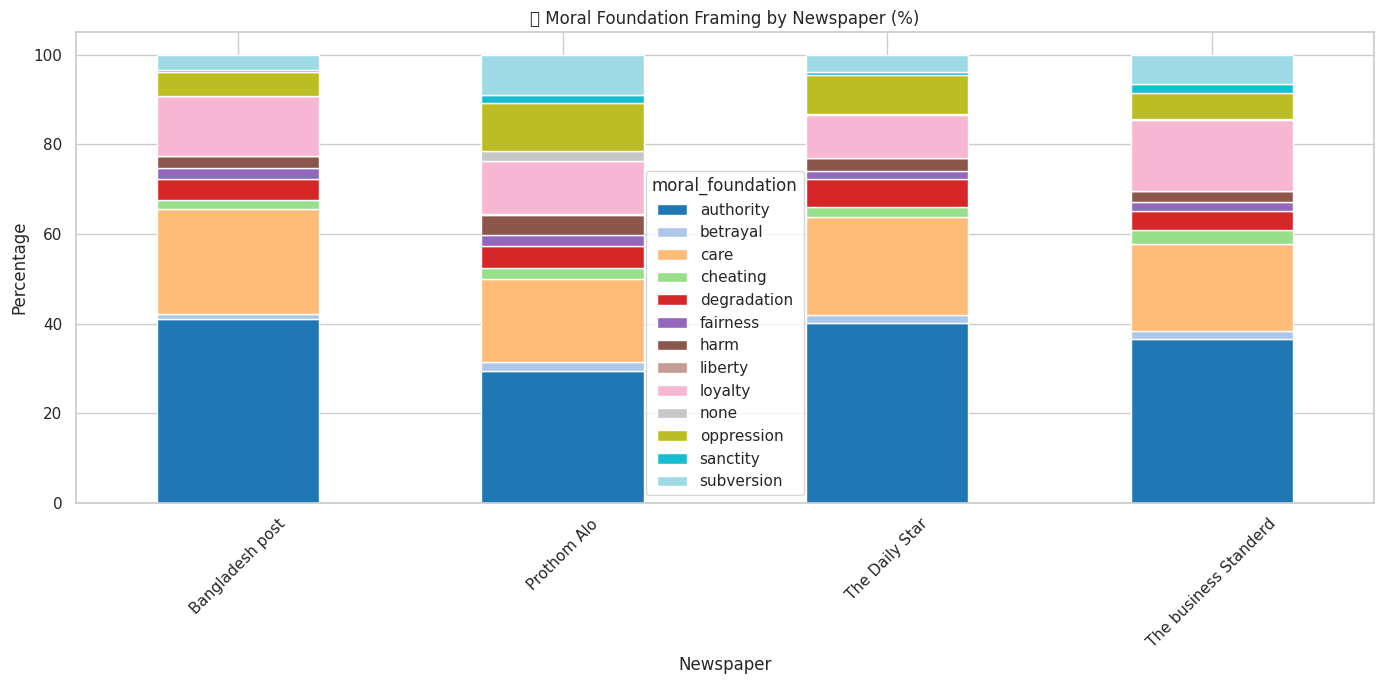

/tmp/ipython-input-17-2050212455.py:101: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-17-2050212455.py:102: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  plt.savefig("newspaper_moral_clustering_pca.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


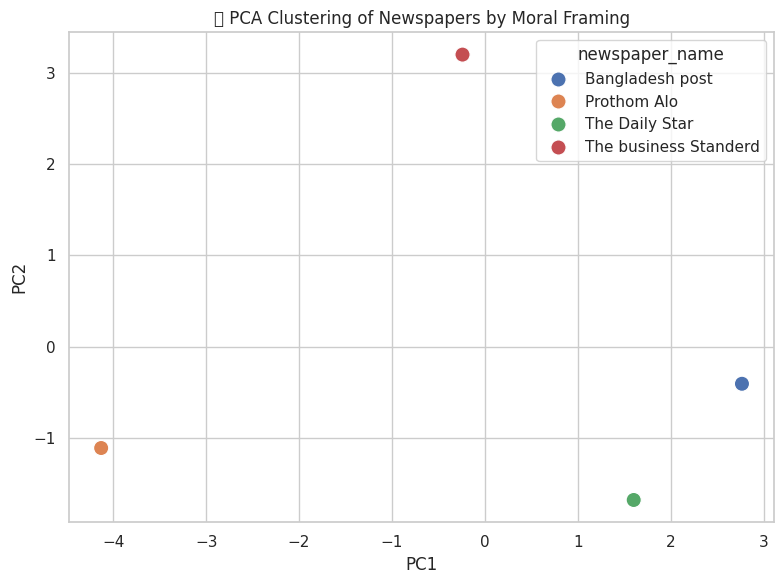

In [ ]:
# 📌 Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import ast

# ------------------------------
# STEP 1: LOAD & CLEAN DATA
# ------------------------------
df = pd.read_csv("/content/drive/MyDrive/all_english_moral_foundation_labeled_bart_with_top_moral.csv", on_bad_lines='skip', engine='python')
df = df.dropna(subset=["Date", "text", "sentiment", "emotion", "top_2_moral_foundations", "newspaper_name"])

# ------------------------------
# STEP 2: PARSE MORAL FOUNDATION
# ------------------------------
def parse_moral_list(raw):
    if pd.isna(raw) or raw.strip().lower() == 'none' or raw.strip() == '':
        return []
    try:
        parsed = ast.literal_eval(raw)
        return [m.strip().lower() for m in parsed if isinstance(m, str)]
    except Exception:
        return []

df["parsed_morals"] = df["top_2_moral_foundations"].apply(parse_moral_list)

# ------------------------------
# STEP 3: EXPLODE FOR ANALYSIS
# ------------------------------
exploded = df.explode("parsed_morals").copy()
exploded = exploded.rename(columns={"parsed_morals": "moral_foundation"})
exploded["emotion"] = exploded["emotion"].astype(str).str.lower().str.strip()
exploded["sentiment"] = exploded["sentiment"].astype(str).str.lower().str.strip()
exploded["moral_foundation"] = exploded["moral_foundation"].fillna("none").str.lower().str.strip()

# ------------------------------
# STEP 4: AGGREGATE + NORMALIZE
# ------------------------------
# 🔹 Moral Foundation
moral_counts = exploded.groupby(["newspaper_name", "moral_foundation"]).size().unstack(fill_value=0)
moral_pct = moral_counts.div(moral_counts.sum(axis=1), axis=0) * 100

# Save outputs
moral_counts.to_csv("newspaper_moral_counts.csv")
moral_pct.to_csv("newspaper_moral_percent.csv")

# ------------------------------
# STEP 5: TOP MORAL FOCUS PER NEWSPAPER
# ------------------------------
top_moral_focus = moral_pct.apply(lambda col: col.sort_values(ascending=False).head(3)).T
top_moral_focus.to_csv("top_moral_foundations_by_newspaper.csv")

# ------------------------------
# STEP 6: CHI-SQUARE TEST
# ------------------------------
chi2, p, dof, expected = chi2_contingency(moral_counts)
chi2_results = {
    "chi2_statistic": chi2,
    "p_value": p,
    "degrees_of_freedom": dof,
    "significant_at_0.05": p < 0.05
}
print("📊 Chi-square test result:", chi2_results)

# ------------------------------
# STEP 7: PCA CLUSTERING
# ------------------------------
scaler = StandardScaler()
moral_scaled = scaler.fit_transform(moral_pct.fillna(0))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(moral_scaled)

pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["newspaper_name"] = moral_pct.index
pca_df.to_csv("newspaper_moral_pca_coordinates.csv", index=False)

# ------------------------------
# STEP 8: VISUALIZATION
# ------------------------------
sns.set(style="whitegrid")

# Stacked bar chart
moral_pct.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title("🧭 Moral Foundation Framing by Newspaper (%)")
plt.ylabel("Percentage")
plt.xlabel("Newspaper")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("moral_foundation_comparison_bar.png")
plt.show()

# PCA scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="newspaper_name", s=120)
plt.title("🧬 PCA Clustering of Newspapers by Moral Framing")
plt.tight_layout()
plt.savefig("newspaper_moral_clustering_pca.png")
plt.show()


In [ ]:
f = pd.read_csv("/content/labeled_with_topics.csv", on_bad_lines='skip', engine='python')
f

,Unnamed: 0,Date,Title,Link,Details,newspaper_name,text,sentiment,emotion,top_2_moral_foundations,top_2_moral_scores,parsed_morals,clean_text,bertopic_label
0,0,2024-09-24,Ex-IGP Mamun on 4-day remand in murder case,https://www.thedailystar.net/news/bangladesh/c...,A Dhaka court today placed former inspector ge...,The Daily Star,Ex-IGP Mamun on 4-day remand in murder case. A...,LABEL_0,anger,"['Authority', 'Care']","{'Authority': 0.7845588326454163, 'Care': 0.64...","['authority', 'care']",exigp mamun on day remand in murder case a dha...,32
1,1,2024-09-24,"Touhid, Jaishankar meet at UNGA, discuss mutua...",https://www.thedailystar.net/news/bangladesh/d...,"Foreign Affairs Adviser, HE Md. Touhid Hossai...",The Daily Star,"Touhid, Jaishankar meet at UNGA, discuss mutua...",LABEL_1,fear,"['Authority', 'Loyalty']","{'Authority': 0.8064534068107605, 'Loyalty': 0...","['authority', 'loyalty']",touhid jaishankar meet at unga discuss mutual ...,47
2,2,2024-09-24,Army chief pledges support for Yunus' interim ...,https://www.thedailystar.net/news/bangladesh/n...,Bangladesh's army chief vowed to back the coun...,The Daily Star,Army chief pledges support for Yunus' interim ...,LABEL_1,anger,"['Subversion', 'Oppression']","{'Subversion': 0.9299159646034241, 'Oppression...","['subversion', 'oppression']",army chief pledges support for yunus interim g...,505
3,3,2024-09-24,Released top criminals at it again,https://www.thedailystar.net/news/bangladesh/c...,"Nasir Biswas, a 26-year-old mason, was walking...",The Daily Star,Released top criminals at it again. Nasir Bisw...,LABEL_1,anger,"['Sanctity', 'Subversion']","{'Sanctity': 0.8243871927261353, 'Subversion':...","['sanctity', 'subversion']",released top criminals at it again nasir biswa...,-1
4,4,2024-09-24,Shibir now out into the open at DU,https://www.thedailystar.net/campus/news/shibi...,"After around three and a half decades, Islami ...",The Daily Star,Shibir now out into the open at DU. After arou...,LABEL_1,disgust,"['Sanctity', 'Cheating']","{'Sanctity': 0.8725903630256653, 'Cheating': 0...","['sanctity', 'cheating']",shibir now out into the open at du after aroun...,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37528,50302,2024-10-05,India foreign minister to visit Pakistan in ra...,https://en.prothomalo.com/international/india/...,India's foreign minister will be in Pakistan l...,Prothom Alo,India foreign minister to visit Pakistan in ra...,LABEL_1,neutral,"['Authority', 'Care']","{'Authority': 0.7862706184387207, 'Care': 0.57...","['authority', 'care']",india foreign minister to visit pakistan in ra...,27
37529,50303,2024-10-05,Initiative to reform Shilpakala Academy Act,https://en.prothomalo.com/entertainment/tkx9v6...,An initiative has been taken to reform Banglad...,Prothom Alo,Initiative to reform Shilpakala Academy Act. A...,LABEL_1,neutral,"['Authority', 'Care']","{'Authority': 0.8890504837036133, 'Care': 0.70...","['authority', 'care']",initiative to reform shilpakala academy act an...,-1
37530,50304,2024-10-05,India bemoan 'harsh' T20 World Cup run-out row,https://en.prothomalo.com/sports/cricket/xzyc3...,India star Jemimah Rodrigues described a run-o...,Prothom Alo,India bemoan 'harsh' T20 World Cup run-out row...,LABEL_1,disgust,"['Harm', 'Care']","{'Harm': 0.9209035634994507, 'Care': 0.8041914...","['harm', 'care']",india bemoan harsh t world cup runout row indi...,-1
37531,50305,2024-10-05,Reform commissions likely to start operations ...,https://en.prothomalo.com/bangladesh/op5bwbj4iz,Although the notification regarding the five o...,Prothom Alo,Reform commissions likely to start operations ...,LABEL_1,neutral,"['Authority', 'Loyalty']","{'Authority': 0.800456702709198, 'Loyalty': 0....","['authority', 'loyalty']",reform commissions likely to start operations ...,219


In [ ]:
known_papers = ["Bangladesh post", "Prothom Alo", "The Daily Star", "The business Standerd"]
f = f[f["newspaper_name"].isin(known_papers)]


In [ ]:
!pip install -q nltk bertopic umap-learn sentence-transformers
!python -m nltk.downloader stopwords punkt
!pip install bertopic

# ------------------------
# STEP 1: IMPORTS + CLEAN
# ------------------------
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import string


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.4 MB/s eta 0:00:00
<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to exe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 📌 Install required packages

# ------------------------
# STEP 2: LOAD & PREP
# ------------------------
df = pd.read_csv("/content/drive/MyDrive/all_english_moral_foundation_labeled_bart_with_top_moral.csv", on_bad_lines='skip', engine='python')
df = df.dropna(subset=["text", "emotion", "top_2_moral_foundations"])

# Parse moral foundations
import ast
def parse_moral_list(raw):
    if pd.isna(raw) or raw.strip().lower() == 'none':
        return []
    try:
        parsed = ast.literal_eval(raw)
        return [m.strip().lower() for m in parsed if isinstance(m, str)]
    except:
        return []

df["parsed_morals"] = df["top_2_moral_foundations"].apply(parse_moral_list)

# ------------------------
# STEP 3: CLEAN TEXT
# ------------------------
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove links
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove punctuation
    text = re.sub(r"\s+", " ", text)  # normalize spaces
    return text.strip()

df["clean_text"] = df["text"].astype(str).apply(clean_text)

# ------------------------
# STEP 4: TF-IDF by MORAL
# ------------------------
print("🔍 Running TF-IDF Keyword Analysis by Moral Foundation...\n")
moral_keywords = {}

stop_words = stopwords.words("english") + [

    # 📰 Common News Verbs
    "said", "told", "asked", "added", "explained", "reported",
   "called", "noted", "stated", "informed","mentioned",

    # 🌍 Generic Context Words
     "people", "media", "news",
   "nation", "authorities", "department", "agency", "city",
    "capital", "district", "area", "union", "village", "region", "place", "spot",

    # 🏛 Institutions & Common Entities (too frequent to be helpful)
     "daily", "star", "prothom", "alo",
    "business", "standard", "post",  "tbs",

    # 🕐 Time Fillers
    "today", "yesterday", "monday", "tuesday", "wednesday", "thursday",
    "friday", "saturday", "sunday", "month", "week", "year", "day",
    "hour", "minutes", "moment", "time", "ago", "soon", "late", "early", "period",

    # 🔤 Fillers / Empty Content
    "would", "could", "should", "can", "may", "might", "still", "even", "get",
    "one", "two", "three", "many", "much", "lot", "several", "every", "another",
    "others", "such", "including", "without", "within", "among", "however", "meanwhile",
    "since", "therefore", "thus", "yet", "also", "just", "almost", "already",

    # 🧍 Pronouns and Determiners
    "they", "he", "she", "we", "you", "i", "his", "her", "their", "our", "them",
    "this", "that", "those", "these", "its", "it", "the", "a", "an",

    # 🔁 Redundant Conjunctions / Prepositions
    "and", "or", "but", "if", "because", "so", "although", "while",
    "in", "on", "at", "from", "with", "about", "to", "for", "by", "of",
    "as", "after", "before", "over", "under", "against", "between", "around",
]


vectorizer = TfidfVectorizer(max_features=1000, stop_words=stop_words)

for moral in df["parsed_morals"].explode().dropna().unique():
    moral_texts = df[df["parsed_morals"].apply(lambda x: moral in x)]["clean_text"]
    if len(moral_texts) < 10: continue

    X = vectorizer.fit_transform(moral_texts)
    tfidf_scores = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1)
    sorted_keywords = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:100]
    moral_keywords[moral] = [word for word, _ in sorted_keywords]

# Save keywords
pd.DataFrame(dict([(k, pd.Series(v)) for k,v in moral_keywords.items()])).to_csv("moral_keywords.csv", index=False)
print("✅ Saved top keywords for each moral foundation → moral_keywords.csv")

# ------------------------
# STEP 5: PHRASE CLUSTERING BY EMOTION
# ------------------------
print("\n🔍 Running Phrase Clustering by Emotion...\n")
emotion_phrase_clusters = {}
vectorizer = TfidfVectorizer(ngram_range=(2,3), stop_words=stop_words, max_features=1000)

for emotion in df["emotion"].str.lower().unique():
    subset = df[df["emotion"].str.lower() == emotion]
    if len(subset) < 10: continue
    X = vectorizer.fit_transform(subset["clean_text"])
    ngrams_scores = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1)
    sorted_phrases = sorted(ngrams_scores, key=lambda x: x[1], reverse=True)[:100]
    emotion_phrase_clusters[emotion] = [ng for ng, _ in sorted_phrases]

# Save results
pd.DataFrame(dict([(k, pd.Series(v)) for k,v in emotion_phrase_clusters.items()])).to_csv("emotion_phrases.csv", index=False)
print("✅ Saved clustered phrases per emotion → emotion_phrases.csv")

# ------------------------
# STEP 6: COLLOCATION ANALYSIS
# ------------------------
print("\n🔍 Running Collocation Analysis...\n")
all_tokens = " ".join(df["clean_text"]).split()
bigrams = list(ngrams(all_tokens, 2))
trigrams = list(ngrams(all_tokens, 3))

bi_freq = Counter(bigrams).most_common(150)
tri_freq = Counter(trigrams).most_common(150)

bi_df = pd.DataFrame(bi_freq, columns=["bigram", "count"])
tri_df = pd.DataFrame(tri_freq, columns=["trigram", "count"])

bi_df.to_csv("collocations_bigrams.csv", index=False)
tri_df.to_csv("collocations_trigrams.csv", index=False)
print("✅ Saved collocations → bigrams and trigrams")

# ------------------------
# STEP 7: BERTopic Modeling
# ------------------------
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print("🔥 Using:", device)

# ✅ Embed with GPU
embedding_model = SentenceTransformer("all-MiniLM-L6-v2", device=device)
docs = df["clean_text"].tolist()
embeddings = embedding_model.encode(docs, show_progress_bar=True, device=device)

# ✅ Run BERTopic
topic_model = BERTopic(embedding_model=embedding_model, language="english", verbose=True)
topics, probs = topic_model.fit_transform(docs, embeddings)

df["bertopic_label"] = topics
df.to_csv("/content/labeled_with_topics.csv", index=False)
topic_model.get_topic_info().to_csv("/content/bertopic_summary.csv", index=False)

# ✅ Visualize
topic_model.visualize_barchart(top_n_topics=10).write_html("/content/bertopic_top_terms.html")
topic_model.visualize_topics().write_html("/content/bertopic_interactive.html")



🔍 Running TF-IDF Keyword Analysis by Moral Foundation...

✅ Saved top keywords for each moral foundation → moral_keywords.csv

🔍 Running Phrase Clustering by Emotion...

✅ Saved clustered phrases per emotion → emotion_phrases.csv

🔍 Running Collocation Analysis...

✅ Saved collocations → bigrams and trigrams
🔥 Using: cuda


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

KeyboardInterrupt: 

In [ ]:
# 📦 Required Libraries
!pip install -q pandas plotly dash nltk

# -------------------------
# ✅ STEP 1: LOAD AND CLEAN
# -------------------------
import pandas as pd
import ast

# Load dataset
df = pd.read_csv("/content/labeled_with_topics.csv")  # Your BERTopic labeled dataset


# Parse date and add regime time flag
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
cutoff = pd.to_datetime("2024-08-05")
df["time_window"] = df["Date"].apply(lambda x: "Before" if x < cutoff else "After")

# Normalize columns
df["sentiment"] = df["sentiment"].str.lower().str.strip()
df["emotion"] = df["emotion"].str.lower().str.strip()

# Parse moral foundation as list
def parse_moral_list(x):
    try:
        if isinstance(x, str) and x.startswith("["):
            lst = ast.literal_eval(x)
        else:
            lst = [x]
        return [i.strip().lower() for i in lst if i and i.strip().lower() != "none"]
    except:
        return []

df["moral_list"] = df["top_2_moral_foundations"].apply(parse_moral_list)

# Explode for per-moral analysis
df_exploded = df.explode("moral_list")

# Save merged dataset
df.to_csv("/content/merged_framing_dataset.csv", index=False)

# -----------------------------
# ✅ STEP 2: SUMMARY BY FRAMING
# -----------------------------
summary = df_exploded.groupby([
    "bertopic_label", "sentiment", "emotion", "moral_list",
    "newspaper_name", "time_window"
]).size().reset_index(name="count")

summary.to_csv("/content/topic_summary_by_frame.csv", index=False)


In [ ]:
!pip install -q dash dash-bootstrap-components
!pip install dash
!pip install dash-bootstrap-components
!pip install dash_html_components
!pip install plotly
!pip install dash_core_components
!pip install dash_html_components

In [ ]:
# 📦 Install dash components


# -------------------------------
# ✅ Dash Application
# -------------------------------
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Load summary
summary = pd.read_csv("/content/topic_summary_by_frame.csv")

# Dash App Setup
app = dash.Dash(__name__, external_stylesheets=["https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/css/bootstrap.min.css"])
app.title = "Bangladeshi Media Framing Dashboard"

# App Layout
app.layout = html.Div([
    html.H2("📰 Moral & Behavioral Framing of Bangladeshi Newspapers", style={"textAlign": "center"}),

    html.Div([
        html.Div([
            html.Label("🧠 Select Emotion"),
            dcc.Dropdown(
                options=[{"label": emo, "value": emo} for emo in sorted(summary["emotion"].dropna().unique())],
                id="emotion-filter",
                multi=True
            ),
        ], className="col"),

        html.Div([
            html.Label("📢 Select Sentiment"),
            dcc.Dropdown(
                options=[{"label": s, "value": s} for s in sorted(summary["sentiment"].dropna().unique())],
                id="sentiment-filter",
                multi=True
            ),
        ], className="col"),

        html.Div([
            html.Label("🏛️ Moral Foundation"),
            dcc.Dropdown(
                options=[{"label": m, "value": m} for m in sorted(summary["moral_list"].dropna().unique())],
                id="moral-filter",
                multi=True
            ),
        ], className="col"),

        html.Div([
            html.Label("🗞 Newspaper"),
            dcc.Dropdown(
                options=[{"label": n, "value": n} for n in sorted(summary["newspaper_name"].dropna().unique())],
                id="paper-filter",
                multi=True
            ),
        ], className="col"),

        html.Div([
            html.Label("📆 Time Window"),
            dcc.Dropdown(
                options=[{"label": t, "value": t} for t in summary["time_window"].dropna().unique()],
                id="time-filter",
                multi=True
            ),
        ], className="col"),

    ], className="row", style={"margin": "20px"}),

    dcc.Graph(id="topic-bar"),
    dcc.Graph(id="topic-sunburst")
])

# -------------------------------
# ✅ Callback: Interactive Graphs
# -------------------------------
@app.callback(
    [Output("topic-bar", "figure"), Output("topic-sunburst", "figure")],
    [Input("emotion-filter", "value"),
     Input("sentiment-filter", "value"),
     Input("moral-filter", "value"),
     Input("paper-filter", "value"),
     Input("time-filter", "value")]
)
def update_graphs(emotion, sentiment, moral, paper, time):
    filtered = summary.copy()

    if emotion:
        filtered = filtered[filtered["emotion"].isin(emotion)]
    if sentiment:
        filtered = filtered[filtered["sentiment"].isin(sentiment)]
    if moral:
        filtered = filtered[filtered["moral_list"].isin(moral)]
    if paper:
        filtered = filtered[filtered["newspaper_name"].isin(paper)]
    if time:
        filtered = filtered[filtered["time_window"].isin(time)]

    bar_fig = px.bar(
        filtered, x="bertopic_label", y="count", color="time_window", barmode="group",
        title="🧠 Topics by Regime Period", labels={"bertopic_label": "Topic"}
    )

    sun_fig = px.sunburst(
        filtered, path=["time_window", "newspaper_name", "moral_list", "emotion"],
        values="count", title="🌞 Framing Breakdown (Sunburst)"
    )

    return bar_fig, sun_fig

# Run the app
app.run(debug=False, port=8050)


<IPython.core.display.Javascript object>

In [ ]:
dx = pd.read_csv("/content/merged_framing_dataset.csv")
dx

,Unnamed: 0,Date,Title,Link,Details,newspaper_name,text,sentiment,emotion,top_2_moral_foundations,top_2_moral_scores,parsed_morals,clean_text,bertopic_label,time_window,moral_list
0,0,2024-09-24,Ex-IGP Mamun on 4-day remand in murder case,https://www.thedailystar.net/news/bangladesh/c...,A Dhaka court today placed former inspector ge...,The Daily Star,Ex-IGP Mamun on 4-day remand in murder case. A...,label_0,anger,"['Authority', 'Care']","{'Authority': 0.7845588326454163, 'Care': 0.64...","['authority', 'care']",exigp mamun on day remand in murder case a dha...,11,After,"['authority', 'care']"
1,1,2024-09-24,"Touhid, Jaishankar meet at UNGA, discuss mutua...",https://www.thedailystar.net/news/bangladesh/d...,"Foreign Affairs Adviser, HE Md. Touhid Hossai...",The Daily Star,"Touhid, Jaishankar meet at UNGA, discuss mutua...",label_1,fear,"['Authority', 'Loyalty']","{'Authority': 0.8064534068107605, 'Loyalty': 0...","['authority', 'loyalty']",touhid jaishankar meet at unga discuss mutual ...,50,After,"['authority', 'loyalty']"
2,2,2024-09-24,Army chief pledges support for Yunus' interim ...,https://www.thedailystar.net/news/bangladesh/n...,Bangladesh's army chief vowed to back the coun...,The Daily Star,Army chief pledges support for Yunus' interim ...,label_1,anger,"['Subversion', 'Oppression']","{'Subversion': 0.9299159646034241, 'Oppression...","['subversion', 'oppression']",army chief pledges support for yunus interim g...,81,After,"['subversion', 'oppression']"
3,3,2024-09-24,Released top criminals at it again,https://www.thedailystar.net/news/bangladesh/c...,"Nasir Biswas, a 26-year-old mason, was walking...",The Daily Star,Released top criminals at it again. Nasir Bisw...,label_1,anger,"['Sanctity', 'Subversion']","{'Sanctity': 0.8243871927261353, 'Subversion':...","['sanctity', 'subversion']",released top criminals at it again nasir biswa...,-1,After,"['sanctity', 'subversion']"
4,4,2024-09-24,Shibir now out into the open at DU,https://www.thedailystar.net/campus/news/shibi...,"After around three and a half decades, Islami ...",The Daily Star,Shibir now out into the open at DU. After arou...,label_1,disgust,"['Sanctity', 'Cheating']","{'Sanctity': 0.8725903630256653, 'Cheating': 0...","['sanctity', 'cheating']",shibir now out into the open at du after aroun...,-1,After,"['sanctity', 'cheating']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37528,50302,2024-10-05,India foreign minister to visit Pakistan in ra...,https://en.prothomalo.com/international/india/...,India's foreign minister will be in Pakistan l...,Prothom Alo,India foreign minister to visit Pakistan in ra...,label_1,neutral,"['Authority', 'Care']","{'Authority': 0.7862706184387207, 'Care': 0.57...","['authority', 'care']",india foreign minister to visit pakistan in ra...,31,After,"['authority', 'care']"
37529,50303,2024-10-05,Initiative to reform Shilpakala Academy Act,https://en.prothomalo.com/entertainment/tkx9v6...,An initiative has been taken to reform Banglad...,Prothom Alo,Initiative to reform Shilpakala Academy Act. A...,label_1,neutral,"['Authority', 'Care']","{'Authority': 0.8890504837036133, 'Care': 0.70...","['authority', 'care']",initiative to reform shilpakala academy act an...,-1,After,"['authority', 'care']"
37530,50304,2024-10-05,India bemoan 'harsh' T20 World Cup run-out row,https://en.prothomalo.com/sports/cricket/xzyc3...,India star Jemimah Rodrigues described a run-o...,Prothom Alo,India bemoan 'harsh' T20 World Cup run-out row...,label_1,disgust,"['Harm', 'Care']","{'Harm': 0.9209035634994507, 'Care': 0.8041914...","['harm', 'care']",india bemoan harsh t world cup runout row indi...,25,After,"['harm', 'care']"
37531,50305,2024-10-05,Reform commissions likely to start operations ...,https://en.prothomalo.com/bangladesh/op5bwbj4iz,Although the notification regarding the five o...,Prothom Alo,Reform commissions likely to start operations ...,label_1,neutral,"['Authority', 'Loyalty']","{'Authority': 0.800456702709198, '

In [ ]:
# 📦 Install NLP Tools
#!pip install -q spacy pandas matplotlib seaborn
#!python -m spacy download en_core_web_sm

# 📚 Imports
import pandas as pd
import spacy
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load preprocessed dataset
df = pd.read_csv("/content/drive/MyDrive/merged_framing_dataset.csv")  # Already labeled with sentiment, emotion, moral, topic
df["Date"] = pd.to_datetime(df["Date"])
df["text"] = df["text"].str.lower()
nlp = spacy.load("en_core_web_sm")

# 📌 Define Political Actors (can customize further)
actor_dict = {"Sheikh Hasina": ["Sheikh Hasina", "Hasina", "Prime Minister"],

    "Waker-Uz-Zaman": ["Army", "Military"],

}

# ✅ Function to detect actor mentions in text
def detect_actors(text):
    found = []
    for label, keywords in actor_dict.items():
        for kw in keywords:
            if kw in text:
                found.append(label)
                break
    return found

# Detect and explode actors
df["actor_mentions"] = df["text"].apply(detect_actors)
df_exploded = df.explode("actor_mentions")
df_exploded = df_exploded.dropna(subset=["actor_mentions", "moral_list", "emotion", "sentiment", "newspaper_name"])

# ✅ Group counts
grouped = df_exploded.groupby([
    "actor_mentions", "newspaper_name", "moral_list", "emotion", "sentiment"
]).size().reset_index(name="count")

# ✅ Normalize by total articles mentioning actor in each paper
total_actor_mentions = df_exploded.groupby(["actor_mentions", "newspaper_name"]).size().reset_index(name="total")
grouped = grouped.merge(total_actor_mentions, on=["actor_mentions", "newspaper_name"])
grouped["percentage"] = grouped["count"] / grouped["total"] * 100

# ✅ Save for visualization and analysis
grouped.to_csv("/content/bias_framing_actor_analysis.csv", index=False)
df_exploded.to_csv("/content/full_actor_moral_exploded.csv", index=False)


In [ ]:
import pandas as pd
import ast

# 📥 Load your file
df = pd.read_csv("/content/actor_bias_framing_by_regime_CLEANED.csv")

# ✅ 1. Clean and Normalize Moral Foundations
def parse_moral_list(moral_str):
    try:
        lst = ast.literal_eval(moral_str)
        return [m.strip().lower() for m in lst if m.strip().lower() not in ["none", ""]]
    except:
        return []

df["moral_list_clean"] = df["moral_list_clean"].apply(parse_moral_list)
df = df.explode("moral_list_clean").dropna(subset=["moral_list_clean"])

# ✅ 2. Group similar actors under umbrellas
actor_map = {
    "chatra leauge": "AL",
    "Awami League": "AL",
    "Police": "Police",
    "Protesters": "Protesters",
    "chatro shibir": "BNP",
    "Khaleda Zia": "BNP",
    "Tarek zia": "BNP",
    "chatradol": "BNP",
    "Jamaat-e-Islami": "BNP"
}
df["actor_group"] = df["actor_group"].map(actor_map)
df = df.dropna(subset=["actor_group"])

# ✅ 3. Remap Sentiment Labels
'''sentiment_map = {
    "label_0": "Negative",
    "label_1": "Positive",
    "label_2": "Neutral"
}
df["sentiment_label"] = df["sentiment_label"].map(sentiment_map)'''

# ✅ 4. Recalculate Bias Framing Summary
grouped = df.groupby([
    "actor_group", "newspaper_name", "moral_list_clean", "emotion", "sentiment_label"
]).size().reset_index(name="count")

# Add percentage
total_mentions = df.groupby(["actor_group", "newspaper_name"]).size().reset_index(name="total")
grouped = grouped.merge(total_mentions, on=["actor_group", "newspaper_name"])
grouped["percentage"] = grouped["count"] / grouped["total"] * 100

# ✅ 5. Save for Next Analysis
grouped.to_csv("/content/bias_framing_actor_analysis_CLEANED.csv", index=False)
print("✅ Cleaned bias framing file saved!")


✅ Cleaned bias framing file saved!


ValueError: zero-size array to reduction operation fmin which has no identity

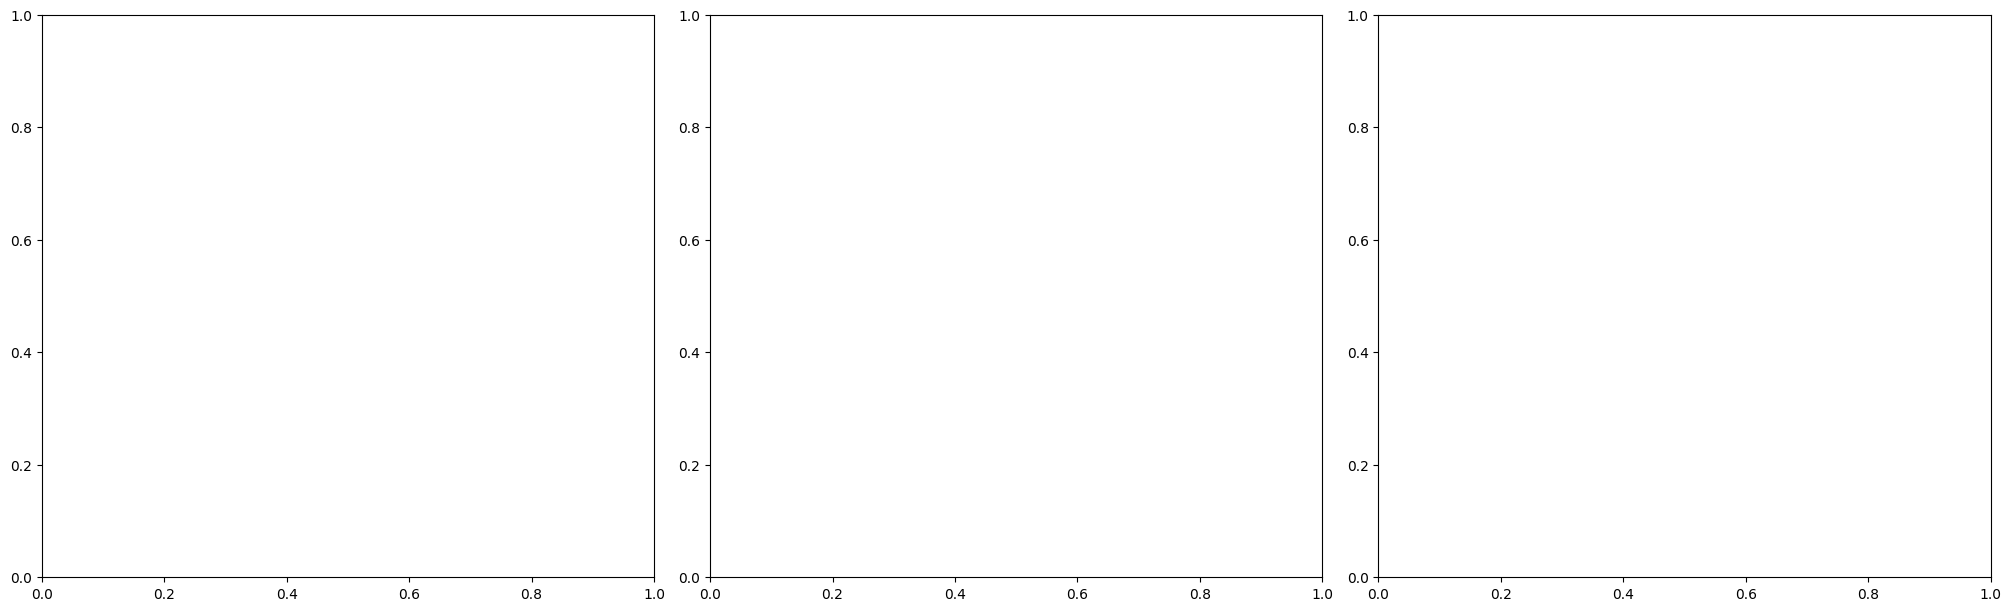

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned file
df = pd.read_csv("/content/actor_bias_framing_by_regime_CLEANED.csv")

# Target actors and newspapers
target_actors = ["Army", "RAB", "Police"]
target_newspapers = ["Prothom Alo", "The Daily Star", "Bangladesh post", "The business Standerd"]

# Filter relevant rows
filtered_df = df[
    df["actor_group"].isin(target_actors) &
    df["newspaper_name"].isin(target_newspapers)
]

# Plot heatmaps of moral framing
fig, axes = plt.subplots(1, len(target_actors), figsize=(20, 6), constrained_layout=True)
for ax, actor in zip(axes, target_actors):
    pivot_df = filtered_df[filtered_df["actor_group"] == actor].pivot_table(
        index="moral_list_clean",
        columns="newspaper_name",
        values="percentage",
        aggfunc="sum",
        fill_value=0
    )
    sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="RdBu_r", ax=ax)
    ax.set_title(f"Moral Framing of {actor}")
    ax.set_ylabel("Moral Foundation")
    ax.set_xlabel("Newspaper")

plt.suptitle("📊 Moral Bias Framing Across Newspapers", fontsize=18)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


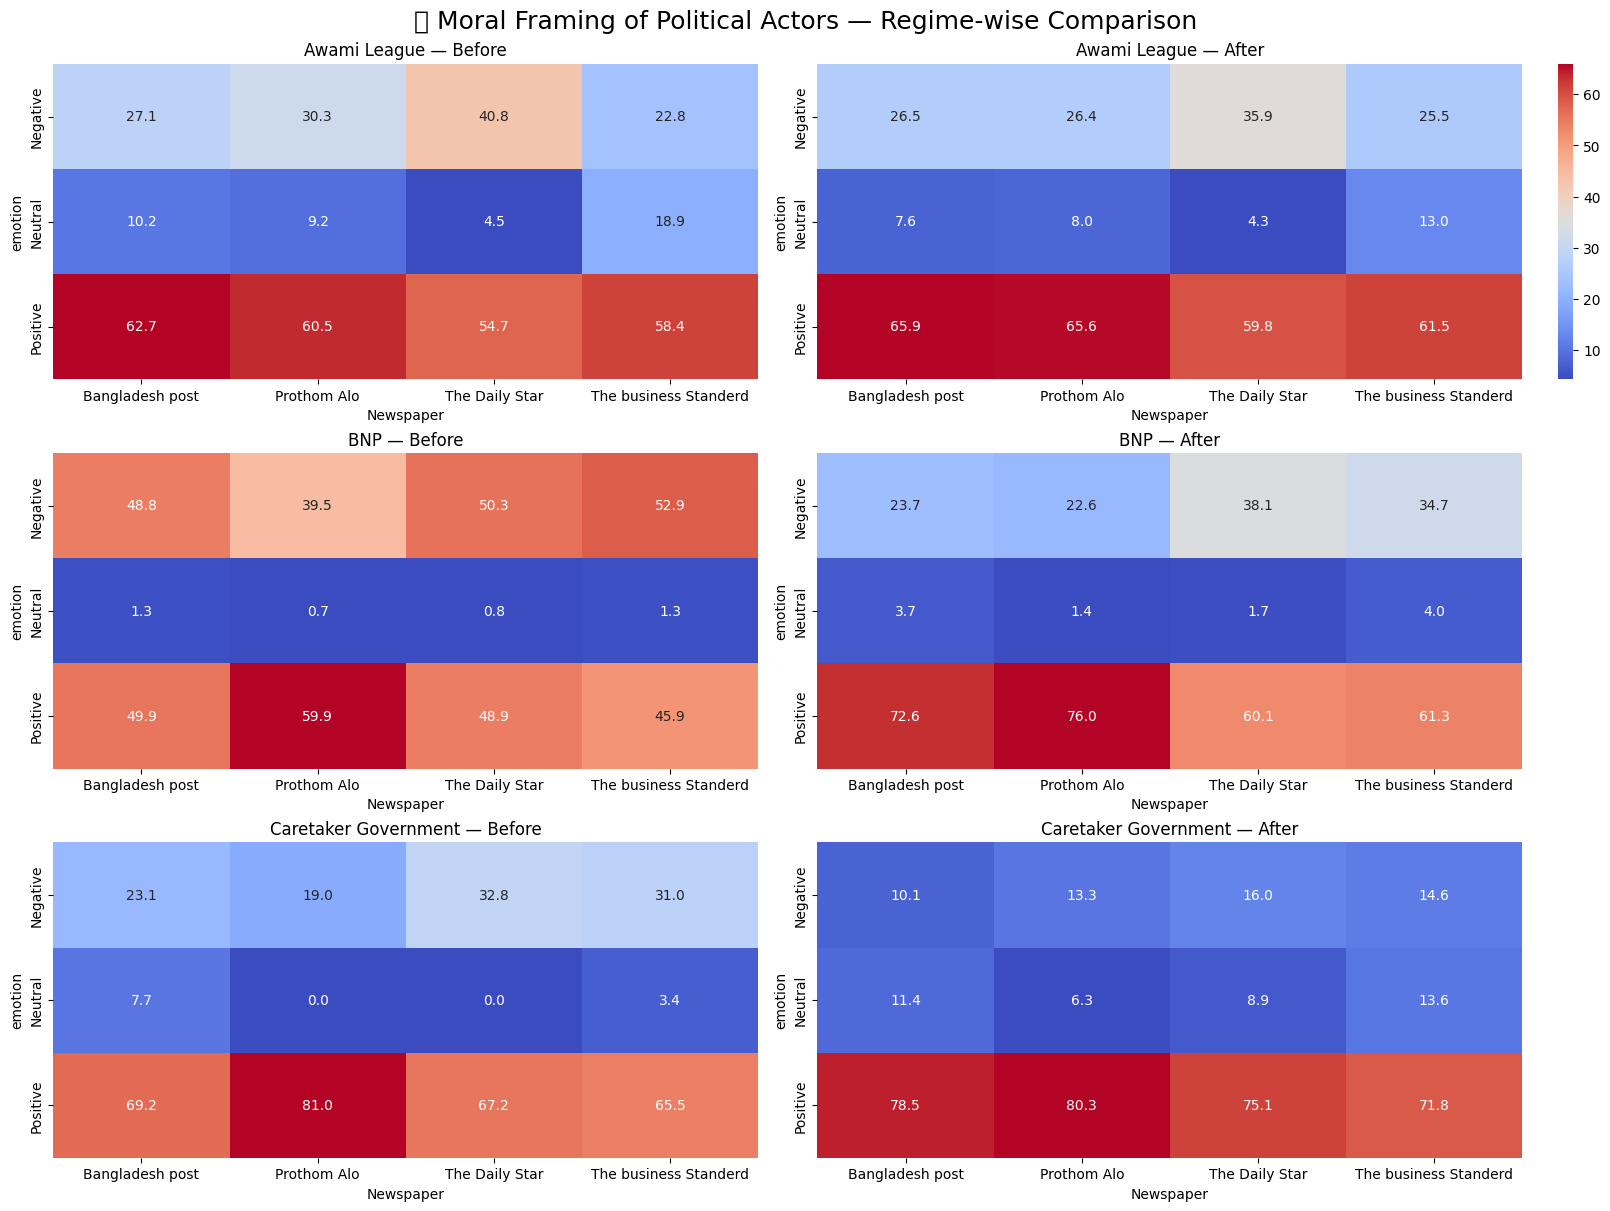

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📥 Load the cleaned dataset
df = pd.read_csv("/content/actor_bias_framing_by_regime_CLEANED.csv")

# 🎯 Target actors and newspapers
target_actors = ["Awami League", "BNP", "Caretaker Government"]
target_newspapers = ["Prothom Alo", "The Daily Star", "Bangladesh post", "The business Standerd"]
regimes = ["Before", "After"]

# 🧼 Filter for relevant actors, newspapers, and regimes
filtered_df = df[
    df["actor_mentions"].isin(target_actors) &
    df["newspaper_name"].isin(target_newspapers) &
    df["Regime"].isin(regimes)
]

# 🎨 Set up figure
fig, axes = plt.subplots(len(target_actors), len(regimes), figsize=(16, 12), constrained_layout=True)

for row_idx, actor in enumerate(target_actors):
    for col_idx, regime in enumerate(regimes):
        ax = axes[row_idx, col_idx]
        subset = filtered_df[
            (filtered_df["actor_mentions"] == actor) &
            (filtered_df["Regime"] == regime)
        ]

        pivot_df = subset.pivot_table(
            index="sentiment_label",
            columns="newspaper_name",
            values="percentage",
            aggfunc="sum",
            fill_value=0
        )

        sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="coolwarm", ax=ax, cbar=(row_idx == 0 and col_idx == 1))
        ax.set_title(f"{actor} — {regime}", fontsize=12)
        ax.set_xlabel("Newspaper")
        ax.set_ylabel("emotion")

plt.suptitle("🧠 Moral Framing of Political Actors — Regime-wise Comparison", fontsize=18)
plt.show()


In [ ]:
# 📚 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import ast

# 📥 Load files
df = pd.read_csv("/content/labeled_with_topics.csv")
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date", "clean_text"])

# 🗓 Add time window
df["time_window"] = df["Date"].apply(lambda x: "Before" if x < pd.to_datetime("2024-08-05") else "After")

# 🧹 Parse morals/emotions
df["parsed_morals"] = df["top_2_moral_foundations"].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith("[") else [x])
df["parsed_morals"] = df["parsed_morals"].apply(lambda x: [i.strip().lower() for i in x if isinstance(i, str)])

# -------------------------------------------
# 1️⃣ MORAL KEYWORD SHIFT (TF-IDF based)
# -------------------------------------------
tfidf_moral = pd.read_csv("moral_keywords.csv")

print("\n🔎 Comparing Moral Keywords Before vs After...\n")
for moral in tfidf_moral.columns:
    before = df[(df["parsed_morals"].apply(lambda x: moral in x)) & (df["time_window"] == "Before")]["clean_text"].str.cat(sep=" ")
    after = df[(df["parsed_morals"].apply(lambda x: moral in x)) & (df["time_window"] == "After")]["clean_text"].str.cat(sep=" ")

    wordcloud_before = WordCloud(width=800, height=400).generate(before)
    wordcloud_after = WordCloud(width=800, height=400).generate(after)

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].imshow(wordcloud_before, interpolation='bilinear')
    ax[0].axis("off")
    ax[0].set_title(f"Before – {moral.title()}")

    ax[1].imshow(wordcloud_after, interpolation='bilinear')
    ax[1].axis("off")
    ax[1].set_title(f"After – {moral.title()}")
    plt.tight_layout()
    plt.show()

# -------------------------------------------
# 2️⃣ EMOTION PHRASE COMPARISON
# -------------------------------------------
emotion_phrases = pd.read_csv("emotion_phrases.csv")
emotion_phrases.fillna("", inplace=True)

print("\n📊 Phrase Usage by Emotion Before vs After...\n")
for emotion in emotion_phrases.columns:
    before_text = df[(df["emotion"].str.lower() == emotion.lower()) & (df["time_window"] == "Before")]["clean_text"].str.cat(sep=" ")
    after_text = df[(df["emotion"].str.lower() == emotion.lower()) & (df["time_window"] == "After")]["clean_text"].str.cat(sep=" ")

    before_ngrams = Counter([ng for ng in emotion_phrases[emotion] if ng and ng in before_text])
    after_ngrams = Counter([ng for ng in emotion_phrases[emotion] if ng and ng in after_text])

    top_before = dict(before_ngrams.most_common(20))
    top_after = dict(after_ngrams.most_common(20))

    print(f"\n--- Emotion: {emotion.upper()} ---")
    print("Top Before:", top_before)
    print("Top After :", top_after)

# -------------------------------------------
# 3️⃣ TOPIC DISTRIBUTION SHIFT (BERTopic)
# -------------------------------------------
print("\n📈 BERTopic Topic Frequency Shift...\n")
topic_counts = df.groupby(["bertopic_label", "time_window"]).size().reset_index(name="count")
pivot = topic_counts.pivot(index="bertopic_label", columns="time_window", values="count").fillna(0)
pivot["delta"] = pivot["After"] - pivot["Before"]
pivot.sort_values("delta", ascending=False).head(10).plot(kind="bar", figsize=(12,6), title="📊 Top 10 Topic Shifts After Regime Change")

plt.ylabel("Article Count")
plt.xlabel("Topic ID")
plt.tight_layout()
plt.show()

# Save topic distribution
pivot.to_csv("/content/topic_distribution_before_after.csv")


In [ ]:
import pandas as pd
import spacy
import ast

# 📥 Load dataset
df = pd.read_csv("/content/merged_framing_dataset.csv")
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
df["text"] = df["text"].astype(str).str.lower()

# 🗓 Add regime label
df["Regime"] = df["Date"].apply(lambda x: "Before" if x < pd.to_datetime("2024-08-05") else "After")

# 🧍 Political Actor Dictionary
actor_dict = {
    "Sheikh Hasina": ["Sheikh Hasina", "Hasina", "Prime Minister"],
    "Dr. Yunus": ["Yunus", "Dr. Yunus", "Muhammad Yunus"],
    "Awami League": ["Awami League", "AL", "ruling party"],
    "BNP": ["BNP", "Bangladesh Nationalist Party"],
    "Caretaker Government": ["Caretaker Government", "Interim Government", "neutral govt"],
    "Police": ["police",  "security forces"],
    "Army": ["Army", "Military"],
    "Protesters": ["protesters", "activists", "students"],
    "RAB": ["RAB", "Rapid Action Battalion"],
    "Jatiya Party": ["Jatiya Party"],
    "chatradol": ["chatradol"],
    "chatra leauge": ["chatra league", "bal"],
    "Jamaat-e-Islami": ["Jamaat-e-Islami", "jamaat"],
    "Khaleda Zia": ["khaleda zia", "khaleda", "bnp chair person"],
    "Tarek zia": ["tarek zia", "tarek"],
    "chatro shibir": ["shibir", "chatro shibir"],
    "Others":["sports","business"]
}

# 🔍 Detect actor mentions
def detect_actors(text):
    found = []
    for label, keywords in actor_dict.items():
        for kw in keywords:
            if kw.lower() in text:
                found.append(label)
                break
    return found

df["actor_mentions"] = df["text"].apply(detect_actors)
df = df.explode("actor_mentions")
df = df.dropna(subset=["actor_mentions", "moral_list", "emotion", "sentiment", "newspaper_name", "Regime"])

# ✅ Clean moral foundation list
def parse_moral_list(moral_str):
    try:
        lst = ast.literal_eval(moral_str)
        return [m.strip().lower() for m in lst if m.strip().lower() not in ["none", ""]]
    except:
        return []

df["moral_list_clean"] = df["moral_list"].apply(parse_moral_list)
df = df.explode("moral_list_clean").dropna(subset=["moral_list_clean"])

# ✅ Group actors under umbrellas
'''actor_map = {
    "chatra leauge": "AL",
    "Awami League": "AL",
    "Police": "Police",
    "Protesters": "Protesters",
    "chatro shibir": "BNP",
    "Khaleda Zia": "BNP",
    "Tarek zia": "BNP",
    "chatradol": "BNP",
    "Jamaat-e-Islami": "BNP",
    "Caretaker Government": "", "Interim Government","neutral govt"],
    "Police": ["police", "rab", "law enforcers", "security forces"],
    "Army":"Army",
    "Military":"Army",
    "Protesters":"students",
    "activists":"students",
    "students":"students",
    "RAB": "RAB",
    "Rapid Action Battalion": "RAB",

}
df["actor_group"] = df["actor_mentions"].map(actor_map)
df = df.dropna(subset=["actor_group"])'''

# ✅ Standardize sentiment
sentiment_map = {
    "label_0": "Negative",
    "label_1": "Positive",
    "label_2": "Neutral"
}
df["sentiment_label"] = df["sentiment"].str.lower().map(sentiment_map)
df = df.dropna(subset=["sentiment_label"])

# ✅ Group counts
grouped = df.groupby([
    "actor_mentions", "newspaper_name", "Regime", "moral_list_clean", "emotion", "sentiment_label"
]).size().reset_index(name="count")

# ✅ Normalize percentage per actor × newspaper × regime
total_mentions = df.groupby(["actor_mentions", "newspaper_name", "Regime"]).size().reset_index(name="total")
grouped = grouped.merge(total_mentions, on=["actor_mentions", "newspaper_name", "Regime"])
grouped["percentage"] = grouped["count"] / grouped["total"] * 100

# ✅ Save outputs
grouped.to_csv("/content/actor_bias_framing_by_regime_CLEANED.csv", index=False)
df.to_csv("/content/full_actor_records_cleaned.csv", index=False)

print("✅ All steps completed and files saved:")
print("→ actor_bias_framing_by_regime_CLEANED.csv")
print("→ full_actor_records_cleaned.csv")


FileNotFoundError: [Errno 2] No such file or directory: '/content/merged_framing_dataset.csv'

FileNotFoundError: [Errno 2] No such file or directory: '/content/merged_framing_dataset.csv'

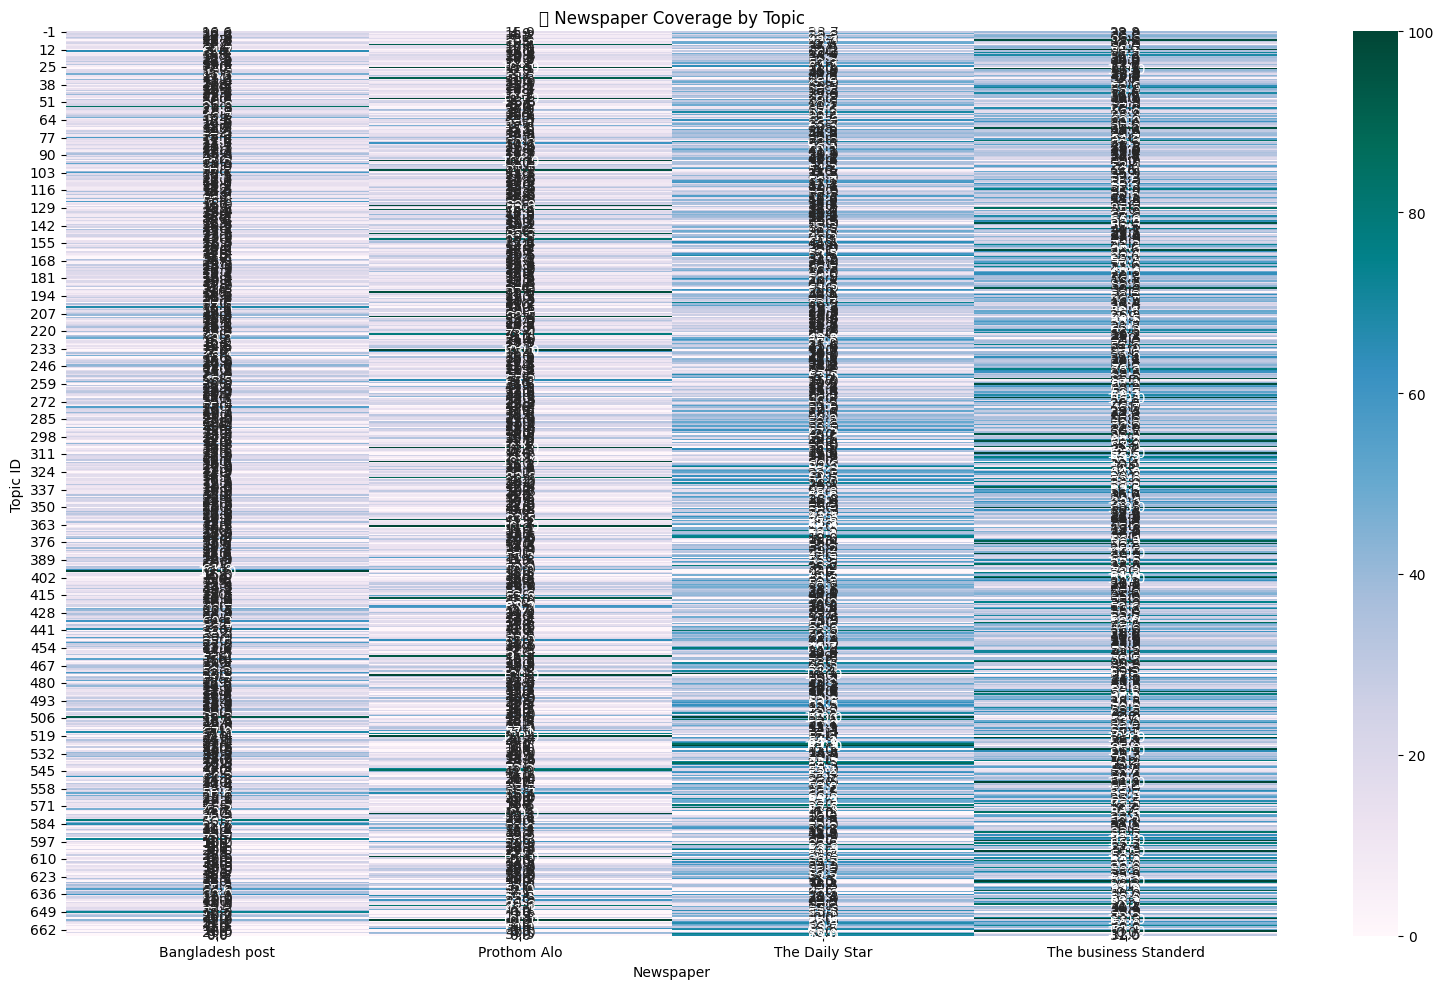

In [ ]:
# Group and normalize topic × newspaper
topic_news = df.groupby(["bertopic_label", "newspaper_name", "time_window"]).size().reset_index(name="count")

# Normalize
topic_totals_news = df.groupby(["bertopic_label", "time_window"]).size().reset_index(name="total")
topic_news = topic_news.merge(topic_totals_news, on=["bertopic_label", "time_window"])
topic_news["percentage"] = (topic_news["count"] / topic_news["total"]) * 100

# Pivot for heatmap
pivot_news = topic_news.pivot_table(index="bertopic_label", columns="newspaper_name", values="percentage", fill_value=0)

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_news, cmap="PuBuGn", annot=True, fmt=".1f")
plt.title("📰 Newspaper Coverage by Topic")
plt.xlabel("Newspaper")
plt.ylabel("Topic ID")
plt.tight_layout()
plt.show()

# Save
pivot_news.to_csv("/content/heatmap_topic_newspaper.csv")


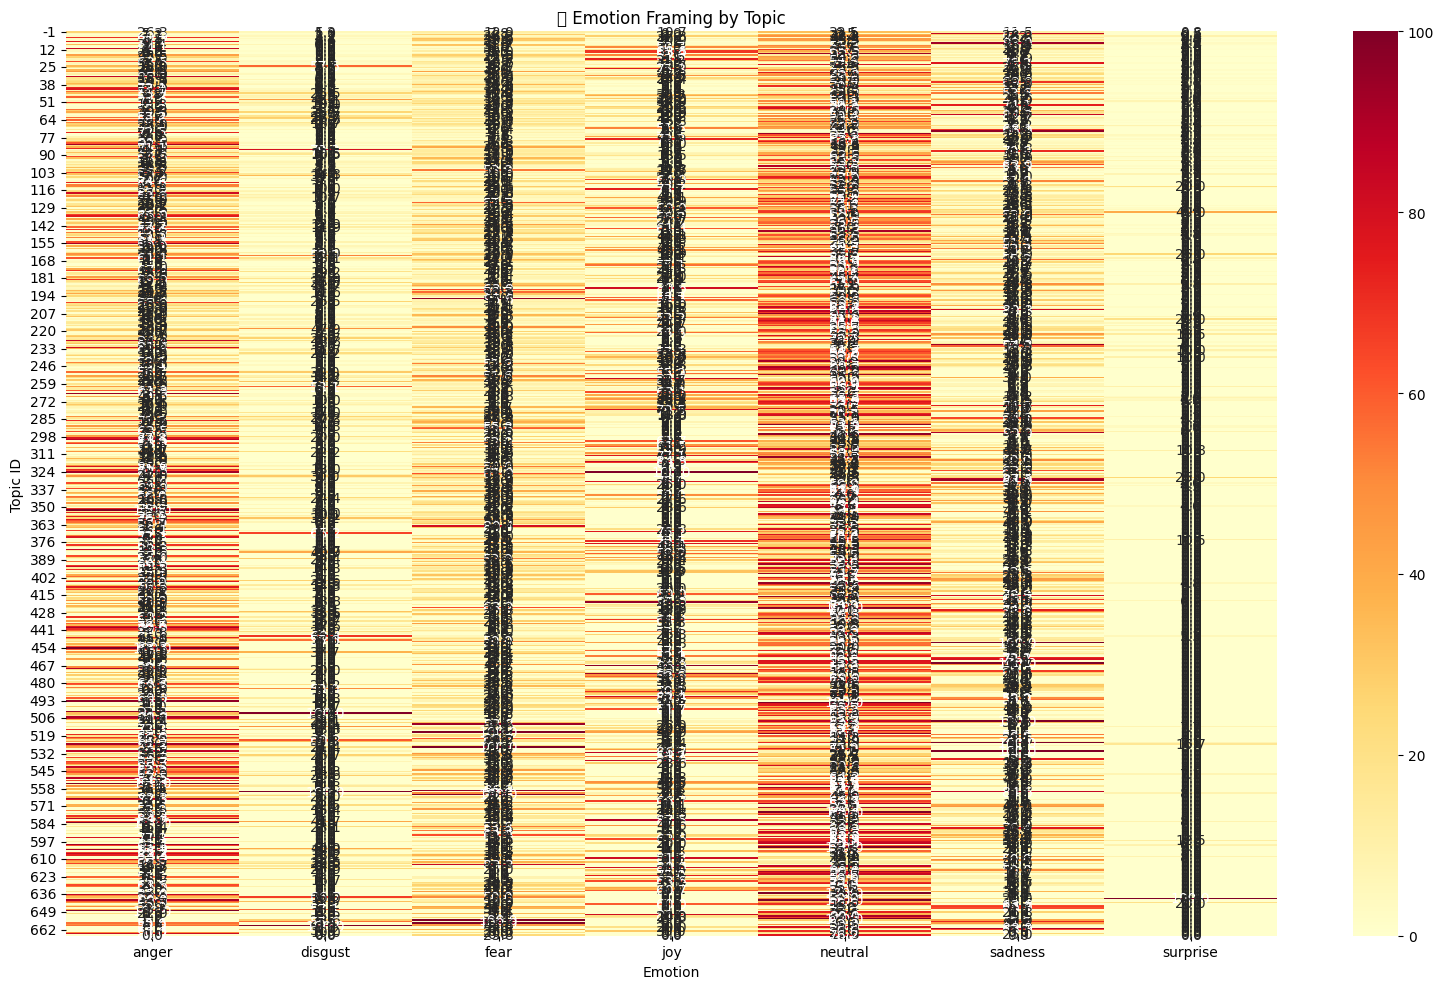

In [ ]:
# Group and normalize topic × emotion distribution
topic_emotion = df.groupby(["bertopic_label", "emotion", "time_window"]).size().reset_index(name="count")

# Normalize by topic size
topic_totals = df.groupby(["bertopic_label", "time_window"]).size().reset_index(name="total")
topic_emotion = topic_emotion.merge(topic_totals, on=["bertopic_label", "time_window"])
topic_emotion["percentage"] = (topic_emotion["count"] / topic_emotion["total"]) * 100

# Pivot for heatmap
pivot_emotion = topic_emotion.pivot_table(index="bertopic_label", columns="emotion", values="percentage", fill_value=0)

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_emotion, cmap="YlOrRd", annot=True, fmt=".1f")
plt.title("🔥 Emotion Framing by Topic")
plt.xlabel("Emotion")
plt.ylabel("Topic ID")
plt.tight_layout()
plt.show()

# Save
pivot_emotion.to_csv("/content/heatmap_topic_emotion.csv")


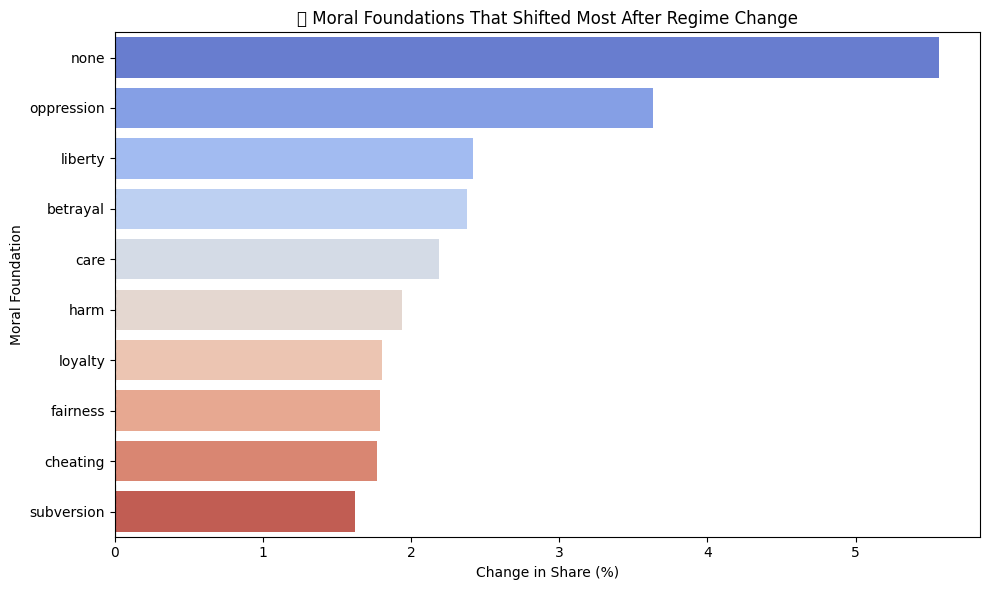

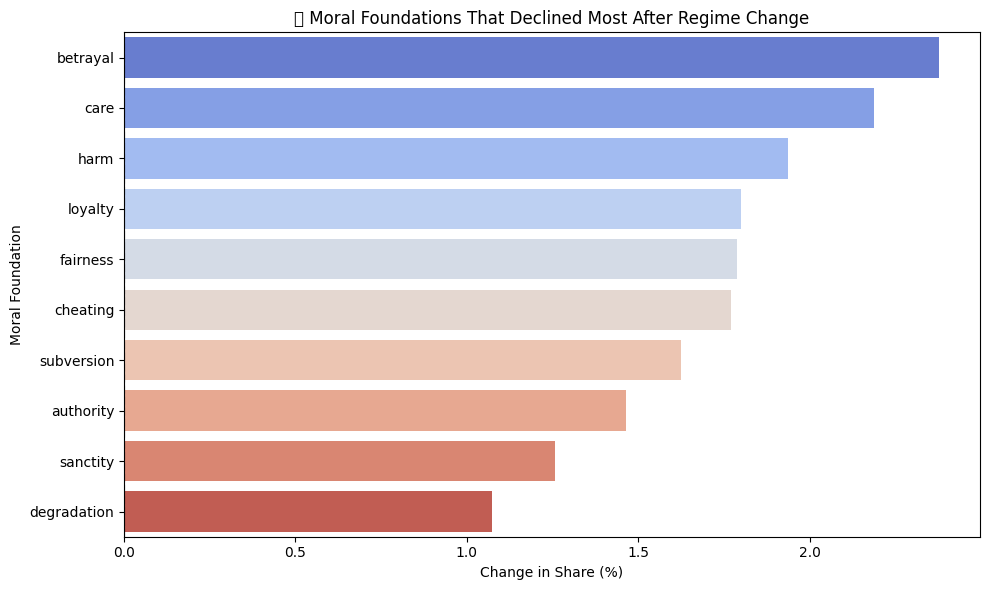

✅ Done. Saved:
- topic_moral_regime_analysis.csv
- topic_emotion_regime_summary.csv
- top_topics_per_moral_by_regime.csv


In [ ]:
# ✅ STEP 3: Moral + Topic Narrative Tracking (BERTopic + Morality)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 📥 Load your preprocessed dataset with BERTopic + Moral Foundations
# Assumes the file contains: 'Date', 'bertopic_label', 'parsed_morals', 'sentiment', 'emotion', 'actor_mentions'
df = pd.read_csv("/content/merged_framing_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])

# 🕐 Define Regime Status
regime_change_date = pd.to_datetime("2024-08-05")
df["Regime"] = df["Date"].apply(lambda x: "Before" if x < regime_change_date else "After")

# 🧼 Parse moral foundations if not parsed
import ast
def parse_moral_list(raw):
    if pd.isna(raw) or raw.strip().lower() == 'none':
        return []
    try:
        parsed = ast.literal_eval(raw)
        return [m.strip().lower() for m in parsed if isinstance(m, str)]
    except:
        return []

df["parsed_morals"] = df["parsed_morals"].apply(lambda x: x if isinstance(x, list) else parse_moral_list(str(x)))
df = df.explode("parsed_morals")
df = df.dropna(subset=["parsed_morals"])  # Remove blank morals

# 📊 Step A: Topic × Moral Foundation × Regime
moral_topic_df = df.groupby(["bertopic_label", "parsed_morals", "Regime"]).size().reset_index(name="count")
total_per_topic = moral_topic_df.groupby(["bertopic_label", "Regime"])['count'].sum().reset_index(name="total")
moral_topic_df = moral_topic_df.merge(total_per_topic, on=["bertopic_label", "Regime"])
moral_topic_df["percentage"] = moral_topic_df["count"] / moral_topic_df["total"] * 100

# 🔍 Find Top Topics for Each Moral Foundation by Regime
top_morals_per_regime = {}
for regime in ["Before", "After"]:
    temp = moral_topic_df[moral_topic_df["Regime"] == regime]
    top_morals = temp.groupby("parsed_morals").apply(lambda x: x.sort_values("percentage", ascending=False).head(3))
    top_morals_per_regime[regime] = top_morals.reset_index(drop=True)

# 💾 Save detailed topic–moral trends
moral_topic_df.to_csv("/content/topic_moral_regime_analysis.csv", index=False)

# 📈 Step B: Visualize top changing moral narratives by topic
pivot = moral_topic_df.pivot_table(
    index="parsed_morals",
    columns="Regime",
    values="percentage",
    aggfunc="mean",
    fill_value=0
).reset_index()

pivot["Change"] = pivot["After"] - pivot["Before"]
pivot = pivot.sort_values("Change", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=pivot.head(10), x="Change", y="parsed_morals", palette="coolwarm")
plt.axvline(0, color='black', linestyle='--')
plt.title("🔍 Moral Foundations That Shifted Most After Regime Change")
plt.xlabel("Change in Share (%)")
plt.ylabel("Moral Foundation")
plt.tight_layout()
plt.show()

# 📉 Bottom 10 (decline)
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot.tail(10), x="Change", y="parsed_morals", palette="coolwarm")
plt.axvline(0, color='black', linestyle='--')
plt.title("🧯 Moral Foundations That Declined Most After Regime Change")
plt.xlabel("Change in Share (%)")
plt.ylabel("Moral Foundation")
plt.tight_layout()
plt.show()

# 📊 Step C: Topic × Emotion cross-analysis (summary)
topic_emotion = df.groupby(["bertopic_label", "emotion", "Regime"]).size().reset_index(name="count")
total_per_topic = topic_emotion.groupby(["bertopic_label", "Regime"])['count'].sum().reset_index(name="total")
topic_emotion = topic_emotion.merge(total_per_topic, on=["bertopic_label", "Regime"])
topic_emotion["percentage"] = topic_emotion["count"] / topic_emotion["total"] * 100
topic_emotion.to_csv("/content/topic_emotion_regime_summary.csv", index=False)

# 🌍 Export: Top topic IDs by dominant moral
top_topics_by_moral = df.groupby(["bertopic_label", "parsed_morals", "Regime"]).size().reset_index(name="count")
top_topics_by_moral = top_topics_by_moral.sort_values("count", ascending=False)
top_topics_by_moral.to_csv("/content/top_topics_per_moral_by_regime.csv", index=False)

print("✅ Done. Saved:")
print("- topic_moral_regime_analysis.csv")
print("- topic_emotion_regime_summary.csv")
print("- top_topics_per_moral_by_regime.csv")


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/merged_framing_dataset.csv')
df

,Unnamed: 0,Date,Title,Link,Details,newspaper_name,text,sentiment,emotion,top_2_moral_foundations,top_2_moral_scores,parsed_morals,clean_text,bertopic_label,time_window,moral_list
0,0,2024-09-24,Ex-IGP Mamun on 4-day remand in murder case,https://www.thedailystar.net/news/bangladesh/c...,A Dhaka court today placed former inspector ge...,The Daily Star,Ex-IGP Mamun on 4-day remand in murder case. A...,label_0,anger,"['Authority', 'Care']","{'Authority': 0.7845588326454163, 'Care': 0.64...","['authority', 'care']",exigp mamun on day remand in murder case a dha...,11,After,"['authority', 'care']"
1,1,2024-09-24,"Touhid, Jaishankar meet at UNGA, discuss mutua...",https://www.thedailystar.net/news/bangladesh/d...,"Foreign Affairs Adviser, HE Md. Touhid Hossai...",The Daily Star,"Touhid, Jaishankar meet at UNGA, discuss mutua...",label_1,fear,"['Authority', 'Loyalty']","{'Authority': 0.8064534068107605, 'Loyalty': 0...","['authority', 'loyalty']",touhid jaishankar meet at unga discuss mutual ...,50,After,"['authority', 'loyalty']"
2,2,2024-09-24,Army chief pledges support for Yunus' interim ...,https://www.thedailystar.net/news/bangladesh/n...,Bangladesh's army chief vowed to back the coun...,The Daily Star,Army chief pledges support for Yunus' interim ...,label_1,anger,"['Subversion', 'Oppression']","{'Subversion': 0.9299159646034241, 'Oppression...","['subversion', 'oppression']",army chief pledges support for yunus interim g...,81,After,"['subversion', 'oppression']"
3,3,2024-09-24,Released top criminals at it again,https://www.thedailystar.net/news/bangladesh/c...,"Nasir Biswas, a 26-year-old mason, was walking...",The Daily Star,Released top criminals at it again. Nasir Bisw...,label_1,anger,"['Sanctity', 'Subversion']","{'Sanctity': 0.8243871927261353, 'Subversion':...","['sanctity', 'subversion']",released top criminals at it again nasir biswa...,-1,After,"['sanctity', 'subversion']"
4,4,2024-09-24,Shibir now out into the open at DU,https://www.thedailystar.net/campus/news/shibi...,"After around three and a half decades, Islami ...",The Daily Star,Shibir now out into the open at DU. After arou...,label_1,disgust,"['Sanctity', 'Cheating']","{'Sanctity': 0.8725903630256653, 'Cheating': 0...","['sanctity', 'cheating']",shibir now out into the open at du after aroun...,-1,After,"['sanctity', 'cheating']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37528,50302,2024-10-05,India foreign minister to visit Pakistan in ra...,https://en.prothomalo.com/international/india/...,India's foreign minister will be in Pakistan l...,Prothom Alo,India foreign minister to visit Pakistan in ra...,label_1,neutral,"['Authority', 'Care']","{'Authority': 0.7862706184387207, 'Care': 0.57...","['authority', 'care']",india foreign minister to visit pakistan in ra...,31,After,"['authority', 'care']"
37529,50303,2024-10-05,Initiative to reform Shilpakala Academy Act,https://en.prothomalo.com/entertainment/tkx9v6...,An initiative has been taken to reform Banglad...,Prothom Alo,Initiative to reform Shilpakala Academy Act. A...,label_1,neutral,"['Authority', 'Care']","{'Authority': 0.8890504837036133, 'Care': 0.70...","['authority', 'care']",initiative to reform shilpakala academy act an...,-1,After,"['authority', 'care']"
37530,50304,2024-10-05,India bemoan 'harsh' T20 World Cup run-out row,https://en.prothomalo.com/sports/cricket/xzyc3...,India star Jemimah Rodrigues described a run-o...,Prothom Alo,India bemoan 'harsh' T20 World Cup run-out row...,label_1,disgust,"['Harm', 'Care']","{'Harm': 0.9209035634994507, 'Care': 0.8041914...","['harm', 'care']",india bemoan harsh t world cup runout row indi...,25,After,"['harm', 'care']"
37531,50305,2024-10-05,Reform commissions likely to start operations ...,https://en.prothomalo.com/bangladesh/op5bwbj4iz,Although the notification regarding the five o...,Prothom Alo,Reform commissions likely to start operations ...,label_1,neutral,"['Authority', 'Loyalty']","{'Authority': 0.800456702709198, '

In [ ]:
import pandas as pd

# ----------------------------------------------------------------------
# CONFIG – change these two lines to match your dataset
DATA_PATH        = "/content/drive/MyDrive/merged_framing_dataset.csv"    # input file
NUM_LABEL_COLUMN = "sentiment"                        # holds 0 / 1 / 2
OUTPUT_PATH      = "news_with_text_labels.parquet"
# ----------------------------------------------------------------------

# 1️⃣  Read the data
df = pd.read_csv(DATA_PATH)

# 2️⃣  Map numbers → text
label_map = {'label_0': "negative", 'label_1': "neutral", 'label_2': "positive"}
df["sentiment"] = df[NUM_LABEL_COLUMN].map(label_map)

# 3️⃣  (Optional) sanity‑check
print(df["sentiment"].value_counts(dropna=False))



sentiment
neutral     22524
negative    11154
positive     3855
Name: count, dtype: int64


In [ ]:
df

,Unnamed: 0,Date,Title,Link,Details,newspaper_name,text,sentiment,emotion,top_2_moral_foundations,top_2_moral_scores,parsed_morals,clean_text,bertopic_label,time_window,moral_list
0,0,2024-09-24,Ex-IGP Mamun on 4-day remand in murder case,https://www.thedailystar.net/news/bangladesh/c...,A Dhaka court today placed former inspector ge...,The Daily Star,Ex-IGP Mamun on 4-day remand in murder case. A...,negative,anger,"['Authority', 'Care']","{'Authority': 0.7845588326454163, 'Care': 0.64...","['authority', 'care']",exigp mamun on day remand in murder case a dha...,11,After,"['authority', 'care']"
1,1,2024-09-24,"Touhid, Jaishankar meet at UNGA, discuss mutua...",https://www.thedailystar.net/news/bangladesh/d...,"Foreign Affairs Adviser, HE Md. Touhid Hossai...",The Daily Star,"Touhid, Jaishankar meet at UNGA, discuss mutua...",neutral,fear,"['Authority', 'Loyalty']","{'Authority': 0.8064534068107605, 'Loyalty': 0...","['authority', 'loyalty']",touhid jaishankar meet at unga discuss mutual ...,50,After,"['authority', 'loyalty']"
2,2,2024-09-24,Army chief pledges support for Yunus' interim ...,https://www.thedailystar.net/news/bangladesh/n...,Bangladesh's army chief vowed to back the coun...,The Daily Star,Army chief pledges support for Yunus' interim ...,neutral,anger,"['Subversion', 'Oppression']","{'Subversion': 0.9299159646034241, 'Oppression...","['subversion', 'oppression']",army chief pledges support for yunus interim g...,81,After,"['subversion', 'oppression']"
3,3,2024-09-24,Released top criminals at it again,https://www.thedailystar.net/news/bangladesh/c...,"Nasir Biswas, a 26-year-old mason, was walking...",The Daily Star,Released top criminals at it again. Nasir Bisw...,neutral,anger,"['Sanctity', 'Subversion']","{'Sanctity': 0.8243871927261353, 'Subversion':...","['sanctity', 'subversion']",released top criminals at it again nasir biswa...,-1,After,"['sanctity', 'subversion']"
4,4,2024-09-24,Shibir now out into the open at DU,https://www.thedailystar.net/campus/news/shibi...,"After around three and a half decades, Islami ...",The Daily Star,Shibir now out into the open at DU. After arou...,neutral,disgust,"['Sanctity', 'Cheating']","{'Sanctity': 0.8725903630256653, 'Cheating': 0...","['sanctity', 'cheating']",shibir now out into the open at du after aroun...,-1,After,"['sanctity', 'cheating']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37528,50302,2024-10-05,India foreign minister to visit Pakistan in ra...,https://en.prothomalo.com/international/india/...,India's foreign minister will be in Pakistan l...,Prothom Alo,India foreign minister to visit Pakistan in ra...,neutral,neutral,"['Authority', 'Care']","{'Authority': 0.7862706184387207, 'Care': 0.57...","['authority', 'care']",india foreign minister to visit pakistan in ra...,31,After,"['authority', 'care']"
37529,50303,2024-10-05,Initiative to reform Shilpakala Academy Act,https://en.prothomalo.com/entertainment/tkx9v6...,An initiative has been taken to reform Banglad...,Prothom Alo,Initiative to reform Shilpakala Academy Act. A...,neutral,neutral,"['Authority', 'Care']","{'Authority': 0.8890504837036133, 'Care': 0.70...","['authority', 'care']",initiative to reform shilpakala academy act an...,-1,After,"['authority', 'care']"
37530,50304,2024-10-05,India bemoan 'harsh' T20 World Cup run-out row,https://en.prothomalo.com/sports/cricket/xzyc3...,India star Jemimah Rodrigues described a run-o...,Prothom Alo,India bemoan 'harsh' T20 World Cup run-out row...,neutral,disgust,"['Harm', 'Care']","{'Harm': 0.9209035634994507, 'Care': 0.8041914...","['harm', 'care']",india bemoan harsh t world cup runout row indi...,25,After,"['harm', 'care']"
37531,50305,2024-10-05,Reform commissions likely to start operations ...,https://en.prothomalo.com/bangladesh/op5bwbj4iz,Although the notification regarding the five o...,Prothom Alo,Reform commissions likely to start operations ...,neutral,neutral,"['Authority', 'Loyalty']","{'Authority': 0.800456702709198, 

In [ ]:
# ── 1. Install once (comment out after first run) ──────────────────────────────
# !pip install -q pandas tqdm transformers torch sentencepiece

# ── 2. Imports & config ───────────────────────────────────────────────────────
import math
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from tqdm.auto import tqdm
import torch

DATA_PATH      = "/content/drive/MyDrive/merged_framing_dataset.csv"          # your input file
TEXT_COLUMN    = "text"              # the column holding article bodies
MODEL_NAME     = "cardiffnlp/twitter-roberta-base-sentiment-latest"
MAX_LEN        = 512                 # model’s max tokens
BATCH_SIZE     = 16                  # adjust to fit your GPU/CPU

# ── 3. Load data ──────────────────────────────────────────────────────────────
df = pd.read_csv(DATA_PATH)
df = df.dropna(subset=[TEXT_COLUMN])          # remove blanks
texts = df[TEXT_COLUMN].astype(str).tolist()

# ── 4. Build pipeline (GPU if available) ──────────────────────────────────────
device = 0 if torch.cuda.is_available() else -1
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model     = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
clf       = pipeline("sentiment-analysis",
                     model=model,
                     tokenizer=tokenizer,
                     device=device,
                     return_all_scores=True)   # we’ll need probabilities

label_map = {0: "negative", 1: "neutral", 2: "positive"}

# ── 5. Helper: run on chunks & aggregate ──────────────────────────────────────
def analyse_article(text):
    # Tokenise first to see how long the article is
    tokens = tokenizer(text, truncation=False, add_special_tokens=False)["input_ids"]
    n_chunks = math.ceil(len(tokens) / MAX_LEN)
    # Split into MAX_LEN‑sized chunks (word‑safe)
    chunks = [" ".join(text.split()[i*2000:(i+1)*2000])  # ~512 tokens ≈ 2 000 words
              for i in range(n_chunks)]

    # Batch‑predict sentiment for all chunks
    scores = clf(chunks, batch_size=BATCH_SIZE)
    # scores is a list of list[dict] – transform to DataFrame‑like dict
    probs = pd.DataFrame([[sc["score"] for sc in chunk] for chunk in scores],
                         columns=[label_map[i] for i in range(3)])
    # Average probabilities across chunks
    mean_probs = probs.mean()
    label = mean_probs.idxmax()
    confidence = mean_probs.max()
    return label, confidence, mean_probs.to_dict()

# ── 6. Run inference ──────────────────────────────────────────────────────────
labels, confidences, prob_dicts = [], [], []
for text in tqdm(texts, desc="Analysing"):
    label, conf, full = analyse_article(text)
    labels.append(label)
    confidences.append(conf)
    prob_dicts.append(full)

df["sentiment"]          = labels
df["sentiment_conf"]     = confidences
df["sentiment_probs"]    = prob_dicts  # keeps full {neg/neu/pos: p} dict

# ── 7. Quick sanity check ─────────────────────────────────────────────────────
print(df["sentiment"].value_counts())
print("Mean confidence:", df["sentiment_conf"].mean().round(3))

# ── 8. Save ───────────────────────────────────────────────────────────────────



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_al

Analysing:   0%|          | 0/37533 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
df

,Unnamed: 0,Date,Title,Link,Details,newspaper_name,text,sentiment,emotion,top_2_moral_foundations,top_2_moral_scores,parsed_morals,clean_text,bertopic_label,time_window,moral_list,sentiment_conf,sentiment_probs
0,0,2024-09-24,Ex-IGP Mamun on 4-day remand in murder case,https://www.thedailystar.net/news/bangladesh/c...,A Dhaka court today placed former inspector ge...,The Daily Star,Ex-IGP Mamun on 4-day remand in murder case. A...,neutral,anger,"['Authority', 'Care']","{'Authority': 0.7845588326454163, 'Care': 0.64...","['authority', 'care']",exigp mamun on day remand in murder case a dha...,11,After,"['authority', 'care']",0.685280,"{'negative': 0.3, 'neutral': 0.69, 'positive':..."
1,1,2024-09-24,"Touhid, Jaishankar meet at UNGA, discuss mutua...",https://www.thedailystar.net/news/bangladesh/d...,"Foreign Affairs Adviser, HE Md. Touhid Hossai...",The Daily Star,"Touhid, Jaishankar meet at UNGA, discuss mutua...",neutral,fear,"['Authority', 'Loyalty']","{'Authority': 0.8064534068107605, 'Loyalty': 0...","['authority', 'loyalty']",touhid jaishankar meet at unga discuss mutual ...,50,After,"['authority', 'loyalty']",0.896096,"{'negative': 0.01, 'neutral': 0.9, 'positive':..."
2,2,2024-09-24,Army chief pledges support for Yunus' interim ...,https://www.thedailystar.net/news/bangladesh/n...,Bangladesh's army chief vowed to back the coun...,The Daily Star,Army chief pledges support for Yunus' interim ...,neutral,anger,"['Subversion', 'Oppression']","{'Subversion': 0.9299159646034241, 'Oppression...","['subversion', 'oppression']",army chief pledges support for yunus interim g...,81,After,"['subversion', 'oppression']",0.724309,"{'negative': 0.02, 'neutral': 0.72, 'positive'..."
3,3,2024-09-24,Released top criminals at it again,https://www.thedailystar.net/news/bangladesh/c...,"Nasir Biswas, a 26-year-old mason, was walking...",The Daily Star,Released top criminals at it again. Nasir Bisw...,neutral,anger,"['Sanctity', 'Subversion']","{'Sanctity': 0.8243871927261353, 'Subversion':...","['sanctity', 'subversion']",released top criminals at it again nasir biswa...,-1,After,"['sanctity', 'subversion']",0.492906,"{'negative': 0.49, 'neutral': 0.49, 'positive'..."
4,4,2024-09-24,Shibir now out into the open at DU,https://www.thedailystar.net/campus/news/shibi...,"After around three and a half decades, Islami ...",The Daily Star,Shibir now out into the open at DU. After arou...,neutral,disgust,"['Sanctity', 'Cheating']","{'Sanctity': 0.8725903630256653, 'Cheating': 0...","['sanctity', 'cheating']",shibir now out into the open at du after aroun...,-1,After,"['sanctity', 'cheating']",0.901937,"{'negative': 0.01, 'neutral': 0.9, 'positive':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37528,50302,2024-10-05,India foreign minister to visit Pakistan in ra...,https://en.prothomalo.com/international/india/...,India's foreign minister will be in Pakistan l...,Prothom Alo,India foreign minister to visit Pakistan in ra...,neutral,neutral,"['Authority', 'Care']","{'Authority': 0.7862706184387207, 'Care': 0.57...","['authority', 'care']",india foreign minister to visit pakistan in ra...,31,After,"['authority', 'care']",0.835208,"{'negative': 0.01, 'neutral': 0.84, 'positive'..."
37529,50303,2024-10-05,Initiative to reform Shilpakala Academy Act,https://en.prothomalo.com/entertainment/tkx9v6...,An initiative has been taken to reform Banglad...,Prothom Alo,Initiative to reform Shilpakala Academy Act. A...,neutral,neutral,"['Authority', 'Care']","{'Authority': 0.8890504837036133, 'Care': 0.70...","['authority', 'care']",initiative to reform shilpakala academy act an...,-1,After,"['authority', 'care']",0.823607,"{'negative': 0.02, 'neutral': 0.82, 'positive'..."
37530,50304,2024-10-05,India bemoan 'harsh' T20 World Cup run-out row,https://en.prothomalo.com/sports/cricket/xzyc3...,India star Jemimah Rodrigues described a run-o...,Prothom Alo,India bemoan 'harsh' T20 World Cup run-out row...,neutral,disgust,"['Harm', 'Ca

In [ ]:
# ⛔ 1. Clean EVERYTHING related to bitsandbytes
!pip uninstall -y bitsandbytes
!rm -rf /usr/local/lib/python*/dist-packages/bitsandbytes*

# ✅ 2. Reinstall a known working version (compatible with transformers ≥4.41)
!pip install -q bitsandbytes==0.43.1

# ✅ 3. Fix gcsfs/fsspec version conflict if needed
!pip install -q fsspec==2025.3.2

# 🔁 4. Now restart the runtime (important!) from menu:
# Runtime > Restart runtime


Found existing installation: bitsandbytes 0.43.1
Uninstalling bitsandbytes-0.43.1:
  Successfully uninstalled bitsandbytes-0.43.1


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from datasets import Dataset
import pandas as pd
from tqdm.auto import tqdm

# ─── Config ─────────────────────────────────────────────
MODEL_NAME = "logicalqubit/deberta-v3-large-business-news-sentiment-classifier"
DATA_PATH = "/content/drive/MyDrive/merged_framing_dataset.csv"
TEXT_COLUMN = "text"
OUTPUT_PATH = "/content/news_with_sentiment.parquet"
BATCH_SIZE = 16
CHUNK_LEN = 512
STRIDE = int(CHUNK_LEN * 0.8)

# ─── Load tokenizer & model ─────────────────────────────
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    torch_dtype=torch.float16,
    device_map="auto",
)
model.eval()

device = model.device
id2label = model.config.id2label

# ─── Load data into HF Dataset ──────────────────────────
df = pd.read_csv(DATA_PATH).dropna(subset=[TEXT_COLUMN])
dataset = Dataset.from_pandas(df)

# ─── Preprocessing: Chunking Long Articles ──────────────
def split_to_chunks(example):
    text = example[TEXT_COLUMN]
    tokens = tokenizer(
        text,
        truncation=False,
        return_offsets_mapping=False,
        add_special_tokens=False
    )["input_ids"]
    chunks = [tokens[i:i + CHUNK_LEN] for i in range(0, len(tokens), STRIDE)]
    chunk_texts = [tokenizer.decode(chunk, skip_special_tokens=True) for chunk in chunks]
    return {"chunks": chunk_texts}

dataset = dataset.map(split_to_chunks, remove_columns=dataset.column_names)

# ─── Batch inference ────────────────────────────────────
def batched_infer(batch):
    inputs = tokenizer(batch["chunks"], padding=True, truncation=True, return_tensors="pt").to(device)
    with torch.no_grad():
        logits = model(**inputs).logits
        probs = torch.softmax(logits, dim=-1).cpu()
    return {"probs": probs.tolist()}

# Unpack chunk lists into one long list for batching
all_chunks = [chunk for chunks in dataset["chunks"] for chunk in chunks]
chunk_ds = Dataset.from_dict({"chunks": all_chunks})

# Run inference in batches
chunk_probs = chunk_ds.map(batched_infer, batched=True, batch_size=BATCH_SIZE)

# ─── Reconstruct per-document label from per-chunk probs ─
from itertools import accumulate
import numpy as np

# Get number of chunks per document
num_chunks_per_doc = [len(chunks) for chunks in dataset["chunks"]]
doc_offsets = list(accumulate([0] + num_chunks_per_doc))

labels, confidences, distributions = [], [], []

for i in tqdm(range(len(num_chunks_per_doc))):
    start, end = doc_offsets[i], doc_offsets[i + 1]
    chunks = chunk_probs["probs"][start:end]
    chunks = torch.tensor(chunks)
    weights = torch.tensor([len(c) for c in dataset["chunks"][i]])
    mean_probs = (chunks * weights.unsqueeze(-1)).sum(dim=0) / weights.sum()
    label_id = int(mean_probs.argmax())
    labels.append(id2label[label_id])
    confidences.append(float(mean_probs.max()))
    distributions.append({id2label[j]: float(p) for j, p in enumerate(mean_probs)})

# ─── Merge and Save ─────────────────────────────────────
df_result = df.copy()
df_result["sentiment"] = labels
df_result["sent_confidence"] = confidences
df_result["sent_prob_dict"] = distributions



Map:   0%|          | 0/37533 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (342 > 256). Running this sequence through the model will result in indexing errors


Map:   0%|          | 0/53521 [00:00<?, ? examples/s]

  0%|          | 0/37533 [00:00<?, ?it/s]

In [ ]:
# prompt: round sentiment_probs in 2 decilam after point

df['sentiment_probs'] = df['sentiment_probs'].apply(
    lambda x: {k: round(v, 2) for k, v in x.items()}
)

print(df[['sentiment_probs']].head())

                                     sentiment_probs
0  {'negative': 0.3, 'neutral': 0.69, 'positive':...
1  {'negative': 0.01, 'neutral': 0.9, 'positive':...
2  {'negative': 0.02, 'neutral': 0.72, 'positive'...
3  {'negative': 0.49, 'neutral': 0.49, 'positive'...
4  {'negative': 0.01, 'neutral': 0.9, 'positive':...
